# Housing Prices

### Contents:
1. **[Data Set](#DF)**
    * Import Libraries
    * Read the data
    * X, y info
***
2. **[Numerical Attributes](#NumAtt)**
    * [Data Visualisation](#DVizz)
***
3. **[Categorical Attributes](#CatAtt)**
    * Distribution of some features highly correlated with Sale Price
***
4. **[Data Cleaning](#DataCleaning)**
    * [Missing Values into Numerical Attributes](#MissValNum)
        * [Fixing Missing Values](#FixMissValAtt)
    * [Missing Values into Categorical Attributes](#MissValCat)
***
5. **[Feature Engineering](#FeatureEng)**
    * [Creating New Features](#CreateNewFeature)
    * [Creating New Boolean Features](#CreateNewBoleanFeature)
    * [Creating features using mathematical transformations](#CreaeNewFeatureMathTransf)
    * [Handling rare categorical values](#HandlRareCatVal)
    * [Imputing Numerical Columns](#ImputingNumericalColumns)
***
6. **[Feature Selection](#FeatureSelection)**
    * [Correlation between X and y](#CorrelationXy)

# 1) Data set<a id = "DF"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from math import ceil

# Missing values
import missingno as msno


from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression

# Advance imputation KNN
from fancyimpute import KNN
from fancyimpute import IterativeImputer


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Read the data
house = pd.read_csv('train.csv', index_col = 'Id')
house_test = pd.read_csv('test.csv', index_col = 'Id')

In [3]:
house.head(3)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  

[3 rows x 80 columns]

In [4]:
# Seperate target value from predictors
X = house.drop(['SalePrice'], axis = 1)
y = house.SalePrice

In [5]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
info = pd.DataFrame(X.dtypes, columns=['Dtype'])
info['Unique'] = X.nunique().values
info['Null'] = X.isnull().sum().values
info.sort_values(by = ['Null'], inplace = True, ascending = False)
info

Dtype  Unique  Null
PoolQC          object       3  1453
MiscFeature     object       4  1406
Alley           object       2  1369
Fence           object       4  1179
FireplaceQu     object       5   690
LotFrontage    float64     110   259
GarageType      object       6    81
GarageYrBlt    float64      97    81
GarageQual      object       5    81
GarageCond      object       5    81
GarageFinish    object       3    81
BsmtFinType2    object       6    38
BsmtExposure    object       4    38
BsmtCond        object       4    37
BsmtFinType1    object       6    37
BsmtQual        object       4    37
MasVnrArea     float64     327     8
MasVnrType      object       4     8
Electrical      object       5     1
BedroomAbvGr     int64       8     0
BsmtHalfBath     int64       3     0
FullBath         int64       4     0
KitchenAbvGr     int64       4     0
HalfBath         int64       3     0
Functional      object       7     0
Fireplaces       int64       4     0
KitchenQual     object       4     0
TotRmsAbvGrd     int64      12     0
MSSubClass       int64      15     0
GrLivArea        int64     861     0
GarageCars       int64       5     0
GarageArea       int64     441     0
PavedDrive      object       3     0
WoodDeckSF       int64     274     0
OpenPorchSF      int64     202     0
EnclosedPorch    int64     120     0
3SsnPorch        int64      20     0
ScreenPorch      int64      76     0
PoolArea         int64       8     0
MiscVal          int64      21     0
MoSold           int64      12     0
YrSold           int64       5     0
SaleType        object       9     0
BsmtFullBath     int64       4     0
HeatingQC       object       5     0
LowQualFinSF     int64      24     0
Neighborhood    object      25     0
OverallCond      int64       9     0
OverallQual      int64      10     0
HouseStyle      object       8     0
BldgType        object       5     0
Condition2      object       8     0
Condition1      object       9     0
LandSlope       object       3     0
2ndFlrSF         int64     417     0
LotConfig       object       5     0
Utilities       object       2     0
LandContour     object       4     0
LotShape        object       4     0
Street          object       2     0
LotArea          int64    1073     0
YearBuilt        int64     112     0
YearRemodAdd     int64      61     0
RoofStyle       object       6     0
RoofMatl        object       8     0
Exterior1st     object      15     0
Exterior2nd     object      16     0
ExterQual       object       4     0
ExterCond       object       5     0
Foundation      object       6     0
BsmtFinSF1       int64     637     0
BsmtFinSF2       int64     144     0
BsmtUnfSF        int64     780     0
TotalBsmtSF      int64     721     0
Heating         object       6     0
MSZoning        object       5     0
CentralAir      object       2     0
1stFlrSF         int64     753     0
SaleCondition   object       6     0

# 2) Numerical Atributes<a id = "NumAtt"></a>

In [8]:
# Lsit of numerical attributes
X.select_dtypes(exclude = ['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [9]:
# Get the data summary
X.select_dtypes(exclude = ['object']).describe().round(decimals = 2).T

count      mean      std     min      25%     50%       75%  \
MSSubClass     1460.0     56.90    42.30    20.0    20.00    50.0     70.00   
LotFrontage    1201.0     70.05    24.28    21.0    59.00    69.0     80.00   
LotArea        1460.0  10516.83  9981.26  1300.0  7553.50  9478.5  11601.50   
OverallQual    1460.0      6.10     1.38     1.0     5.00     6.0      7.00   
OverallCond    1460.0      5.58     1.11     1.0     5.00     5.0      6.00   
YearBuilt      1460.0   1971.27    30.20  1872.0  1954.00  1973.0   2000.00   
YearRemodAdd   1460.0   1984.87    20.65  1950.0  1967.00  1994.0   2004.00   
MasVnrArea     1452.0    103.69   181.07     0.0     0.00     0.0    166.00   
BsmtFinSF1     1460.0    443.64   456.10     0.0     0.00   383.5    712.25   
BsmtFinSF2     1460.0     46.55   161.32     0.0     0.00     0.0      0.00   
BsmtUnfSF      1460.0    567.24   441.87     0.0   223.00   477.5    808.00   
TotalBsmtSF    1460.0   1057.43   438.71     0.0   795.75   991.5   1298.25   
1stFlrSF       1460.0   1162.63   386.59   334.0   882.00  1087.0   1391.25   
2ndFlrSF       1460.0    346.99   436.53     0.0     0.00     0.0    728.00   
LowQualFinSF   1460.0      5.84    48.62     0.0     0.00     0.0      0.00   
GrLivArea      1460.0   1515.46   525.48   334.0  1129.50  1464.0   1776.75   
BsmtFullBath   1460.0      0.43     0.52     0.0     0.00     0.0      1.00   
BsmtHalfBath   1460.0      0.06     0.24     0.0     0.00     0.0      0.00   
FullBath       1460.0      1.57     0.55     0.0     1.00     2.0      2.00   
HalfBath       1460.0      0.38     0.50     0.0     0.00     0.0      1.00   
BedroomAbvGr   1460.0      2.87     0.82     0.0     2.00     3.0      3.00   
KitchenAbvGr   1460.0      1.05     0.22     0.0     1.00     1.0      1.00   
TotRmsAbvGrd   1460.0      6.52     1.63     2.0     5.00     6.0      7.00   
Fireplaces     1460.0      0.61     0.64     0.0     0.00     1.0      1.00   
GarageYrBlt    1379.0   1978.51    24.69  1900.0  1961.00  1980.0   2002.00   
GarageCars     1460.0      1.77     0.75     0.0     1.00     2.0      2.00   
GarageArea     1460.0    472.98   213.80     0.0   334.50   480.0    576.00   
WoodDeckSF     1460.0     94.24   125.34     0.0     0.00     0.0    168.00   
OpenPorchSF    1460.0     46.66    66.26     0.0     0.00    25.0     68.00   
EnclosedPorch  1460.0     21.95    61.12     0.0     0.00     0.0      0.00   
3SsnPorch      1460.0      3.41    29.32     0.0     0.00     0.0      0.00   
ScreenPorch    1460.0     15.06    55.76     0.0     0.00     0.0      0.00   
PoolArea       1460.0      2.76    40.18     0.0     0.00     0.0      0.00   
MiscVal        1460.0     43.49   496.12     0.0     0.00     0.0      0.00   
MoSold         1460.0      6.32     2.70     1.0     5.00     6.0      8.00   
YrSold         1460.0   2007.82     1.33  2006.0  2007.00  2008.0   2009.00   

                    max  
MSSubClass        190.0  
LotFrontage       313.0  
LotArea        215245.0  
OverallQual        10.0  
OverallCond         9.0  
YearBuilt        2010.0  
YearRemodAdd     2010.0  
MasVnrArea       1600.0  
BsmtFinSF1       5644.0  
BsmtFinSF2       1474.0  
BsmtUnfSF        2336.0  
TotalBsmtSF      6110.0  
1stFlrSF         4692.0  
2ndFlrSF         2065.0  
LowQualFinSF      572.0  
GrLivArea        5642.0  
BsmtFullBath        3.0  
BsmtHalfBath        2.0  
FullBath            3.0  
HalfBath            2.0  
BedroomAbvGr        8.0  
KitchenAbvGr        3.0  
TotRmsAbvGrd       14.0  
Fireplaces          3.0  
GarageYrBlt      2010.0  
GarageCars          4.0  
GarageArea       1418.0  
WoodDeckSF        857.0  
OpenPorchSF       547.0  
EnclosedPorch     552.0  
3SsnPorch         508.0  
ScreenPorch       480.0  
PoolArea          738.0  
MiscVal         15500.0  
MoSold             12.0  
YrSold           2010.0

* Note: **MSSubClass** is ectualy categorical variable, not int.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES


## Correlations Among Numerical Attributes

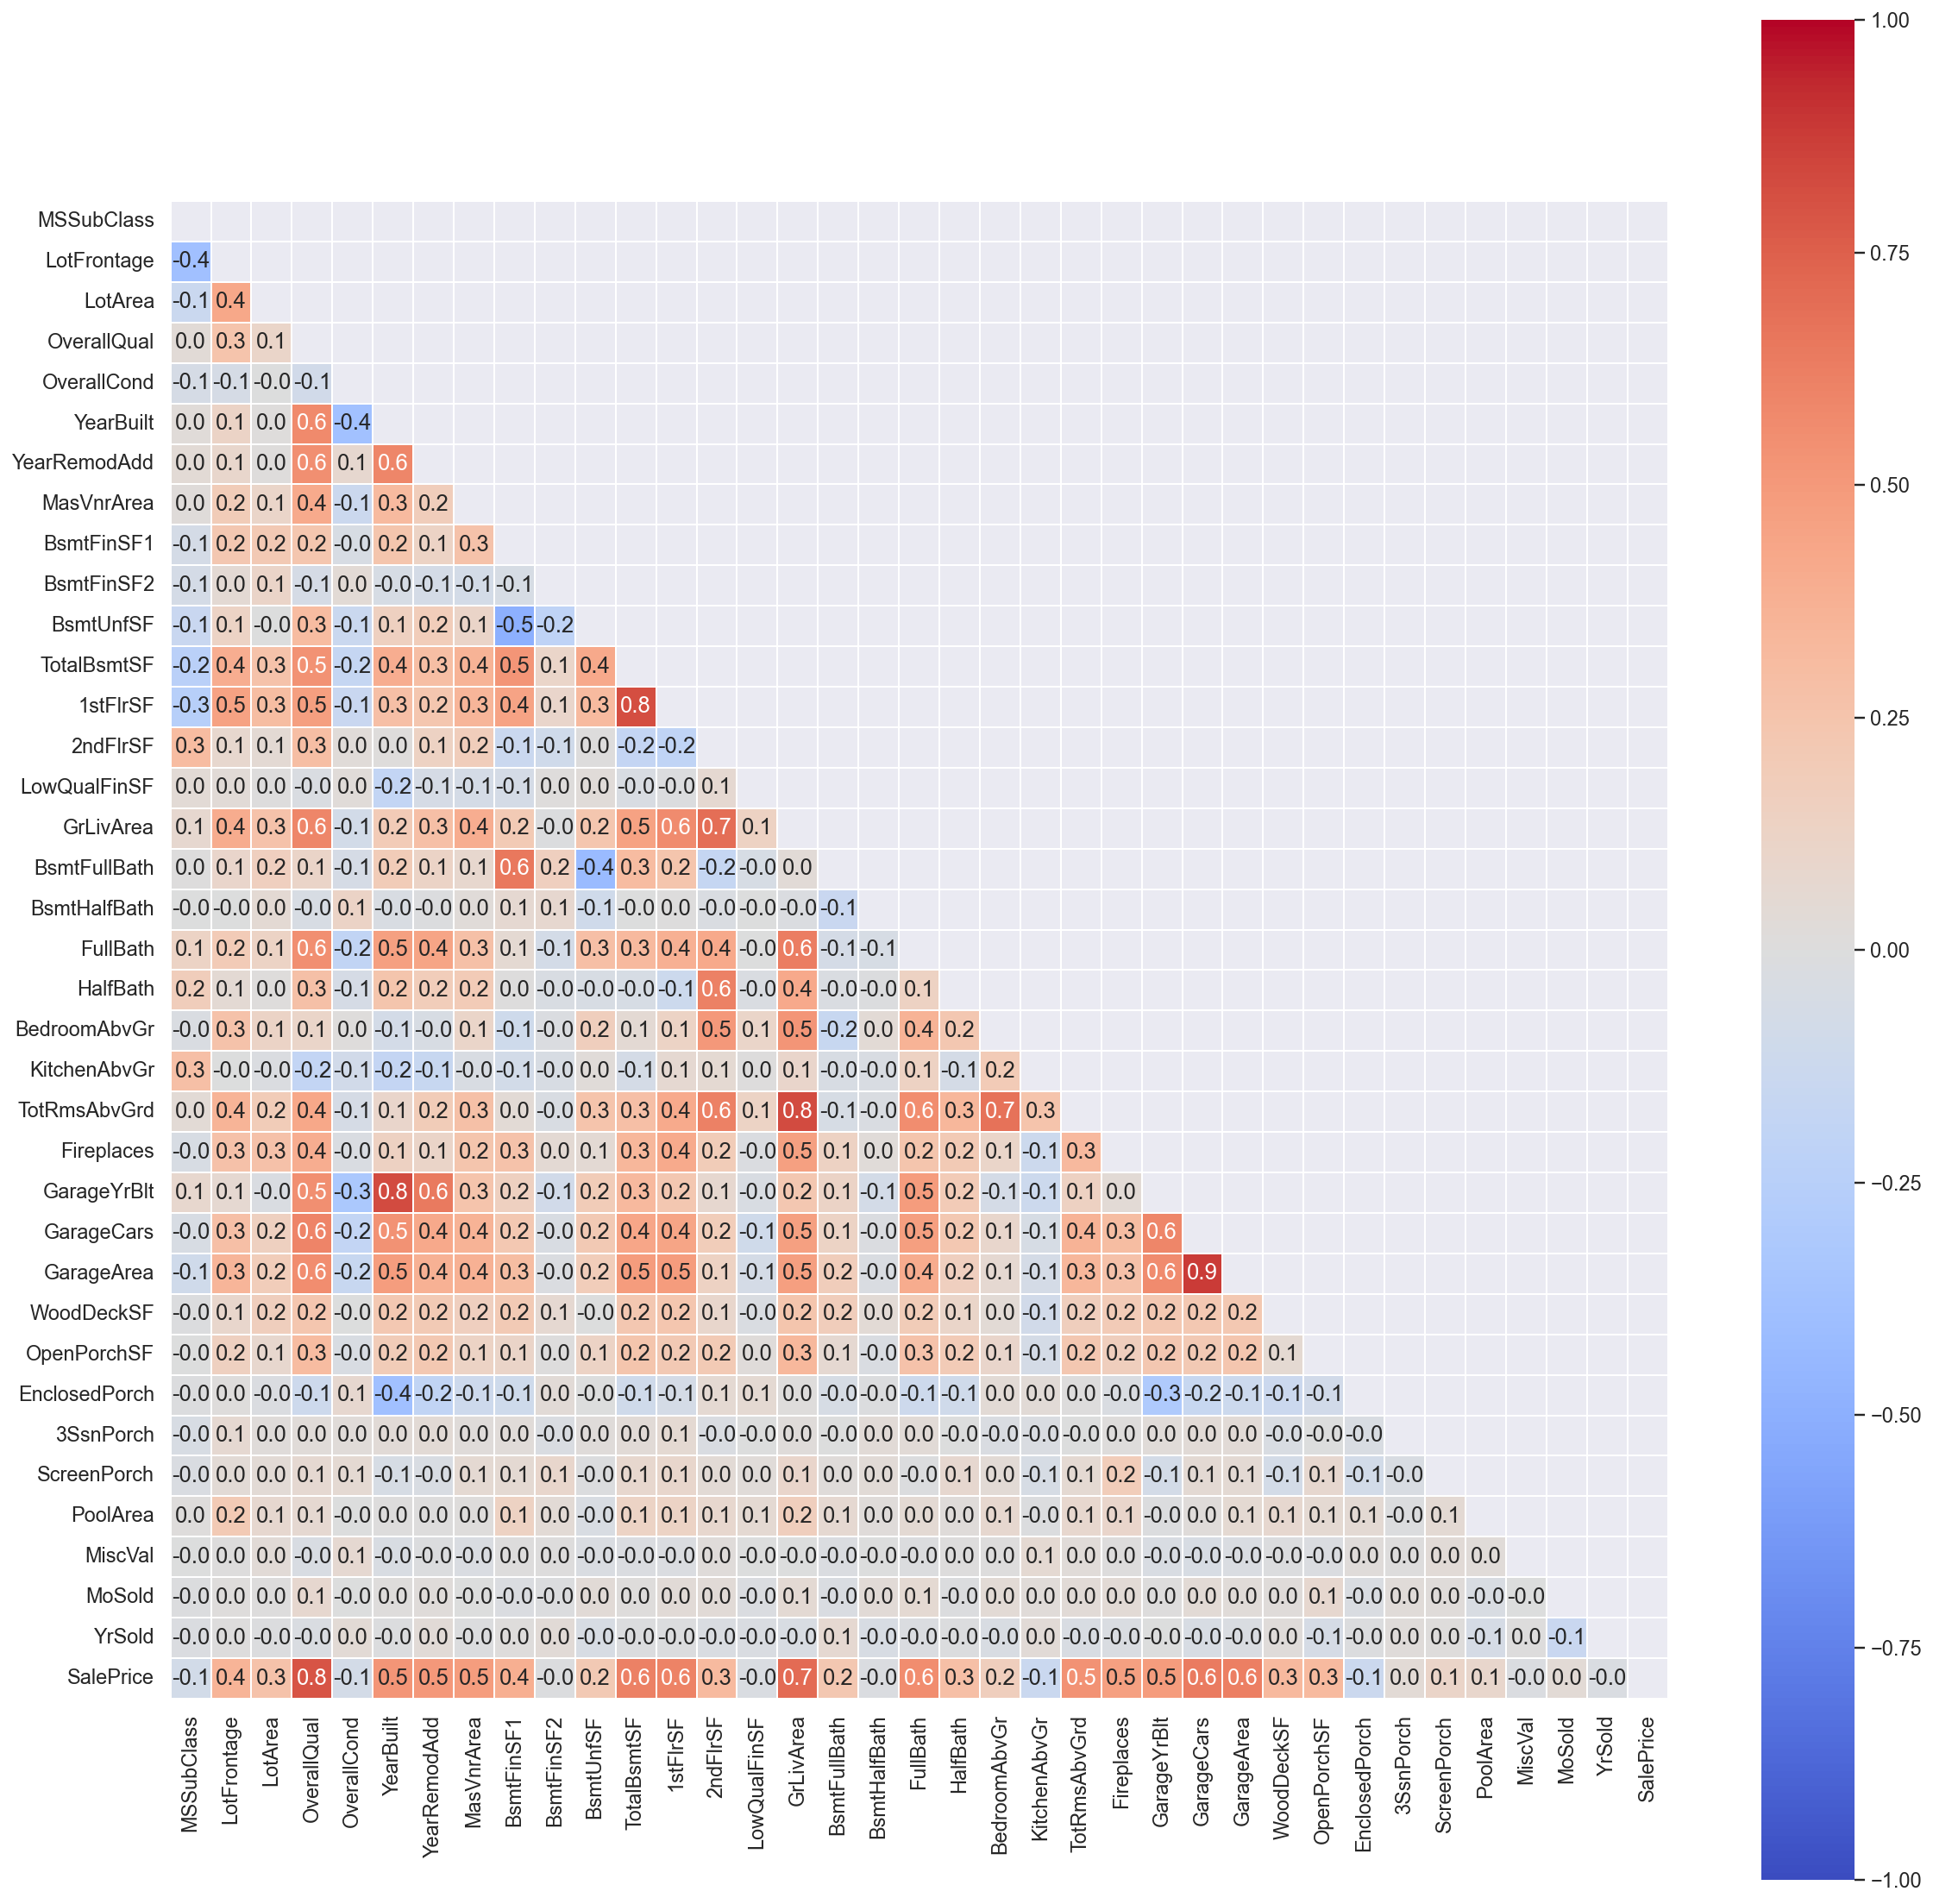

In [10]:
house_num_att = house.select_dtypes(exclude = ['object'])

corr_matrix = house_num_att.corr()

# Return copy of an array with upper part of the triangle
mask = np.triu(corr_matrix.corr())

sns.set(font_scale = 1.1)
plt.figure(figsize = (20, 20), dpi = 140)
sns.heatmap(corr_matrix, annot = True, fmt = '.1f', cmap = 'coolwarm', 
            square = True, mask = mask, linewidths = 1, vmin = -1.0, vmax = 1.0)
plt.show()

From the heatmap, we can easily see that we have some variables that are highly correlated with price (*dark red*) such as **'OverallQual**, **'GrLivArea'**, and that there are variables highly correlated among themselves as well such as **'GarageArea** and **'GarageCars**.
The heatmap is useful for a first high-level overview.
Let's get a sorted list of correlations among all the attributes and the target variable, **'SalePrice'**, for a deeper understanding of what's going on.

In [11]:
corr_matrix['SalePrice'].abs().sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

In [12]:
col = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars' ]
sns.pairplot(house_num_att[col])
plt.show()

From the pairplots, we can clearly see how an increase in **GrLivArea** the price increases as well.
* **GrLivArea**: Above grade (ground) living area square feet

In [13]:
corr_sp_ga = corr_matrix['SalePrice'].GarageArea
corr_sp_gg = corr_matrix['SalePrice'].GarageCars
print(f" \'SalePrice\' corrleantion with \'GarageArea\': {corr_sp_ga.round(3)}\
and with \'GarageCars\': {corr_sp_gg.round(3)}. " )

 'SalePrice' corrleantion with 'GarageArea': 0.623and with 'GarageCars': 0.64. 


**'GarageArea'** and **'GarageCars'** both have a high correlation with price. **Do we need both?**

The heatmap suggests that these two variables are highly correlated among themselves, so only one should be sufficient for modeling purpose.

In [14]:
# Only important correlations and not auto-correlations

important_corr = (corr_matrix[abs(corr_matrix) > 0.5][corr_matrix != 1.0]).unstack().dropna().to_dict()

unique_important_corr = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corr[key]) for key in important_corr])), 
                columns = ['attribute pair', 'correlation'])

# Sorted by asolute value
unique_important_corr = unique_important_corr.iloc[abs(unique_important_corr['correlation']).argsort()[::-1]]

unique_important_corr

attribute pair  correlation
33      (GarageArea, GarageCars)     0.882475
31      (GarageYrBlt, YearBuilt)     0.825667
28     (GrLivArea, TotRmsAbvGrd)     0.825489
13       (1stFlrSF, TotalBsmtSF)     0.819530
5       (OverallQual, SalePrice)     0.790982
30        (GrLivArea, SalePrice)     0.708624
36         (2ndFlrSF, GrLivArea)     0.687501
15  (BedroomAbvGr, TotRmsAbvGrd)     0.676620
6     (BsmtFinSF1, BsmtFullBath)     0.649212
20   (GarageYrBlt, YearRemodAdd)     0.642277
0        (GarageCars, SalePrice)     0.640409
35         (FullBath, GrLivArea)     0.630012
29       (GarageArea, SalePrice)     0.623431
24      (2ndFlrSF, TotRmsAbvGrd)     0.616423
21      (SalePrice, TotalBsmtSF)     0.613581
26          (2ndFlrSF, HalfBath)     0.609707
10         (1stFlrSF, SalePrice)     0.605852
25     (GarageCars, OverallQual)     0.600671
8       (GrLivArea, OverallQual)     0.593007
9      (YearBuilt, YearRemodAdd)     0.592855
11     (GarageCars, GarageYrBlt)     0.588920
22      (OverallQual, YearBuilt)     0.572323
17         (1stFlrSF, GrLivArea)     0.566024
16     (GarageArea, GarageYrBlt)     0.564567
32     (GarageArea, OverallQual)     0.562022
14         (FullBath, SalePrice)     0.560664
4       (FullBath, TotRmsAbvGrd)     0.554784
12   (OverallQual, YearRemodAdd)     0.550684
3        (FullBath, OverallQual)     0.550600
19    (GarageYrBlt, OverallQual)     0.547766
7        (GarageCars, YearBuilt)     0.537850
18    (OverallQual, TotalBsmtSF)     0.537808
37     (SalePrice, TotRmsAbvGrd)     0.533723
27        (SalePrice, YearBuilt)     0.522897
34     (BsmtFinSF1, TotalBsmtSF)     0.522396
23     (BedroomAbvGr, GrLivArea)     0.521270
1      (SalePrice, YearRemodAdd)     0.507101
2       (2ndFlrSF, BedroomAbvGr)     0.502901

For the **Feature selection** phase we can drop the highly correlated variables.
**Example** : **'GarageCars'** and **'GarageArea** are highly correlated but since **'GarageCars** has a higher correlation with the target variable **'SalePrice**, we are going to keep one of them.

We could also drop the attributes that have almost no correlations with **'SalePrice'** like  **'MoSold'**.

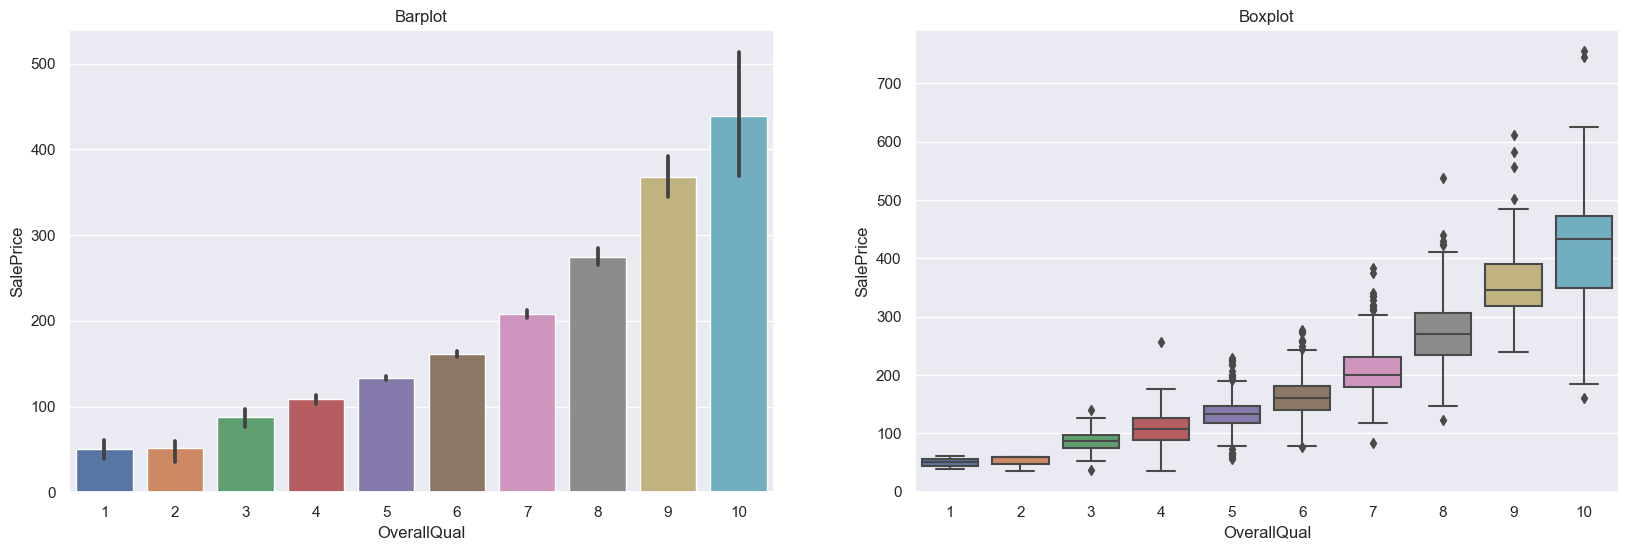

In [15]:
sns.set()
fig, ax = plt.subplots(1, 2, figsize = (20,6), dpi = 100)

sns.barplot( x = house['OverallQual'], y = house['SalePrice']/1000, ax = ax[0])
ax[0].set_title('Barplot')
ax[0].set_xlabel(xlabel = 'OverallQual')


sns.boxplot(x = house['OverallQual'], y = house['SalePrice']/1000, data = house, ax= ax[1])
ax[1].set_title('Boxplot')
ax[1].set_xlabel(xlabel = 'OverallQual')


plt.show()

Now we can clearly see how prices change with quality, higher price is so obvious. But we can also notice that at higher qualities there is much higher variability in prices.

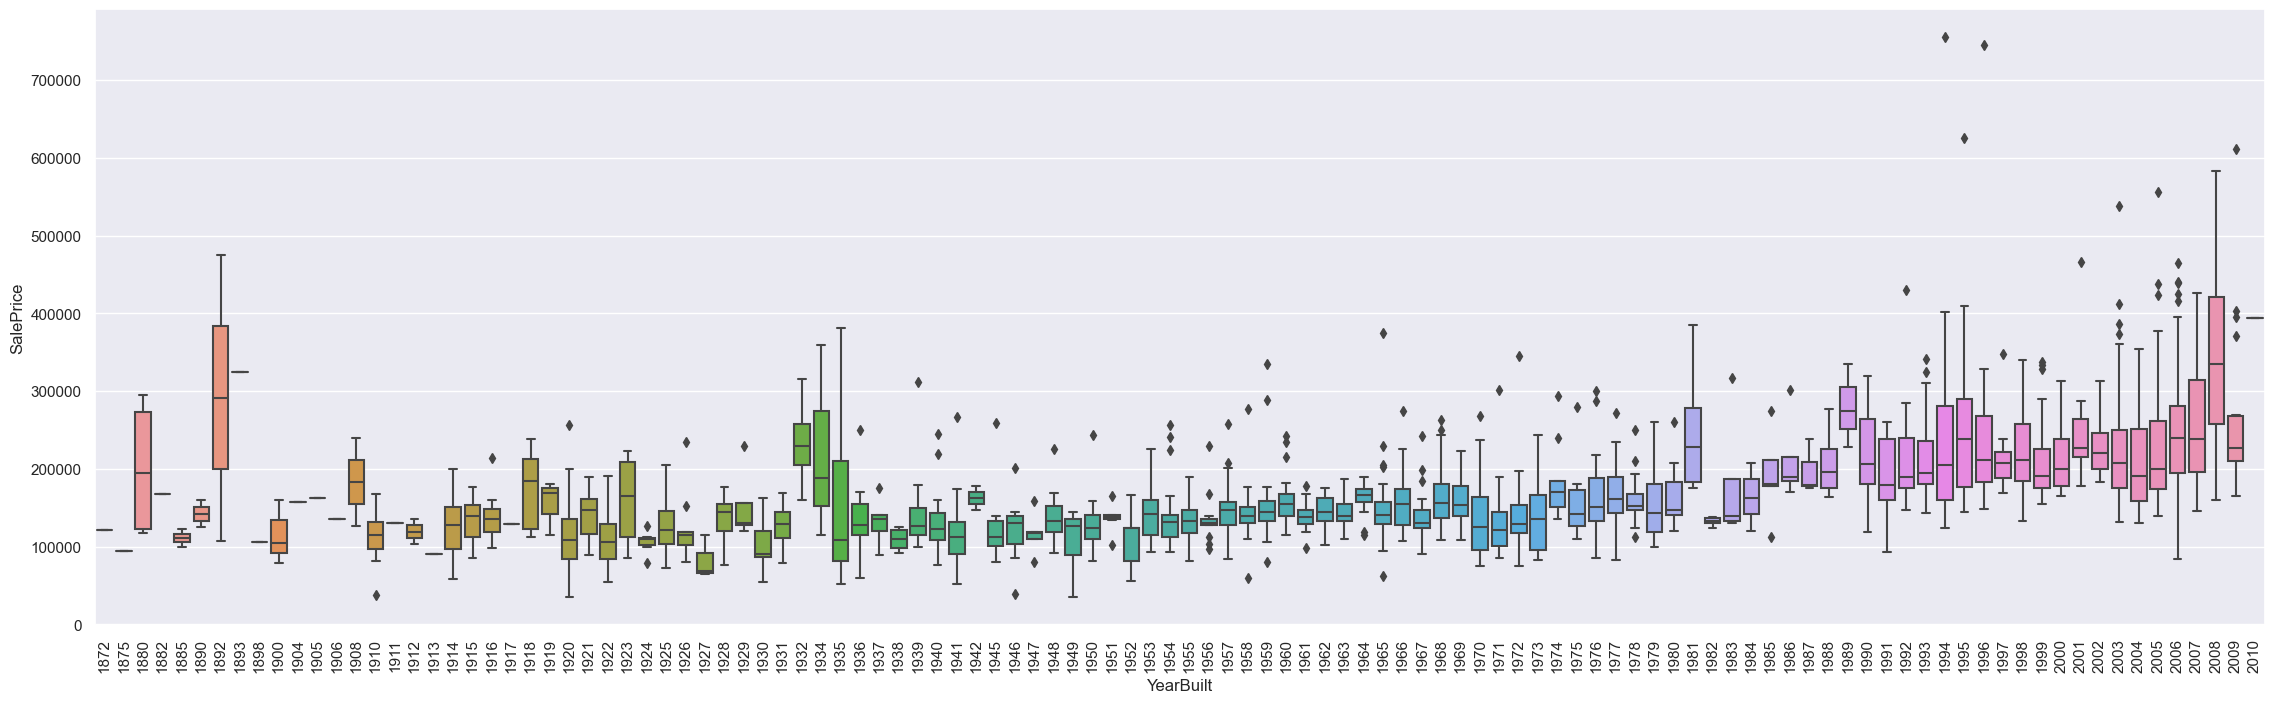

In [16]:
plt.figure(figsize= (28,8))
plt.xticks(rotation = 90)
sns.boxplot(x = house['YearBuilt'], y = house['SalePrice']);

Some of the very old houses are expensive, but overall the newest houses tend to have higher prices.

## 2.1) Data Visualisation<a id="DVizz"></a>

In [17]:
def univariate_numerical_plot_2(df,x):
    fig, ax = plt.subplots(2, 2, figsize = (15,12), dpi = 100)
    
    # 0) histogram
    sns.histplot(data = df, x = x, kde = True, ax = ax[0][0], bins = min(df[x].nunique(),10), kde_kws = {'bw_adjust':3} )
    sns.despine(bottom = True, left = True)
    ax[0][0].set_title('histogram')
    ax[0][0].set_xlabel(xlabel = x)
    
    # 1) box plot
    sns.boxplot(data = df, x = x, ax= ax[0][1])
    ax[0][1].set_title('boxplot')
    ax[0][1].set_xlabel(xlabel = x) 
    
    # 2) ecdf plot- empirical cumulative distribution functions
    sns.ecdfplot(data = df, x = x, ax = ax[1][0])
    ax[1][0].set_title('ecdf')
    ax[1][0].set_xlabel(xlabel = x)
    
    # 3) vilolin plot
    sns.violinplot(data = X, x= 'YearBuilt', ax = ax[1][1])
    ax[1][1].set_title('violinplot')
    ax[1][1].set_xlabel(xlabel = 'Yaer Built')

    
    plt.legend([],[], frameon = False)
    
    
    # To add border
    fig.subplots_adjust(top = 0.8, bottom = 0.15, left = 0.2, hspace = 0.8)
    fig.patch.set_linewidth(10)
    fig.patch.set_edgecolor('cornflowerblue')
    
    fig.tight_layout()
    fig.text(0.5, 1, f'Distirbution of {x}', size = 25, ha = 'center', va = 'center')
    plt.show()

#### Sale Price

In [18]:
# Distribution of target variable
univariate_numerical_plot_2(house,'SalePrice')

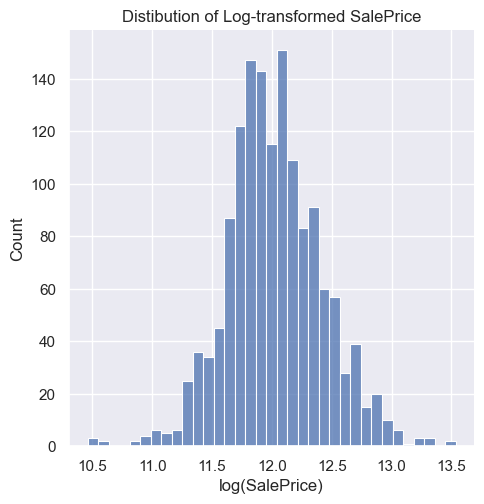

In [19]:
# Take the log to make the distibution more normal
sns.displot(np.log(house['SalePrice']));
plt.title('Distibution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

In [20]:
Xy = house.copy()
Xy['log(SalePrice)'] = np.log(house['SalePrice'])
Xy.sample()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
120          60       RL         65.0     8461   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                      
120         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

    Condition2 BldgType  ... OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                       ...                                         
120       Norm     1Fam  ...          24              0          0   

     ScreenPorch  PoolArea PoolQC Fence MiscFeature MiscVal MoSold  YrSold  \
Id                                                                           
120            0         0    NaN   NaN         NaN       0      7    2006   

    SaleType SaleCondition SalePrice log(SalePrice)  
Id                                                   
120      New       Partial    163990      12.007561  

[1 rows x 81 columns]

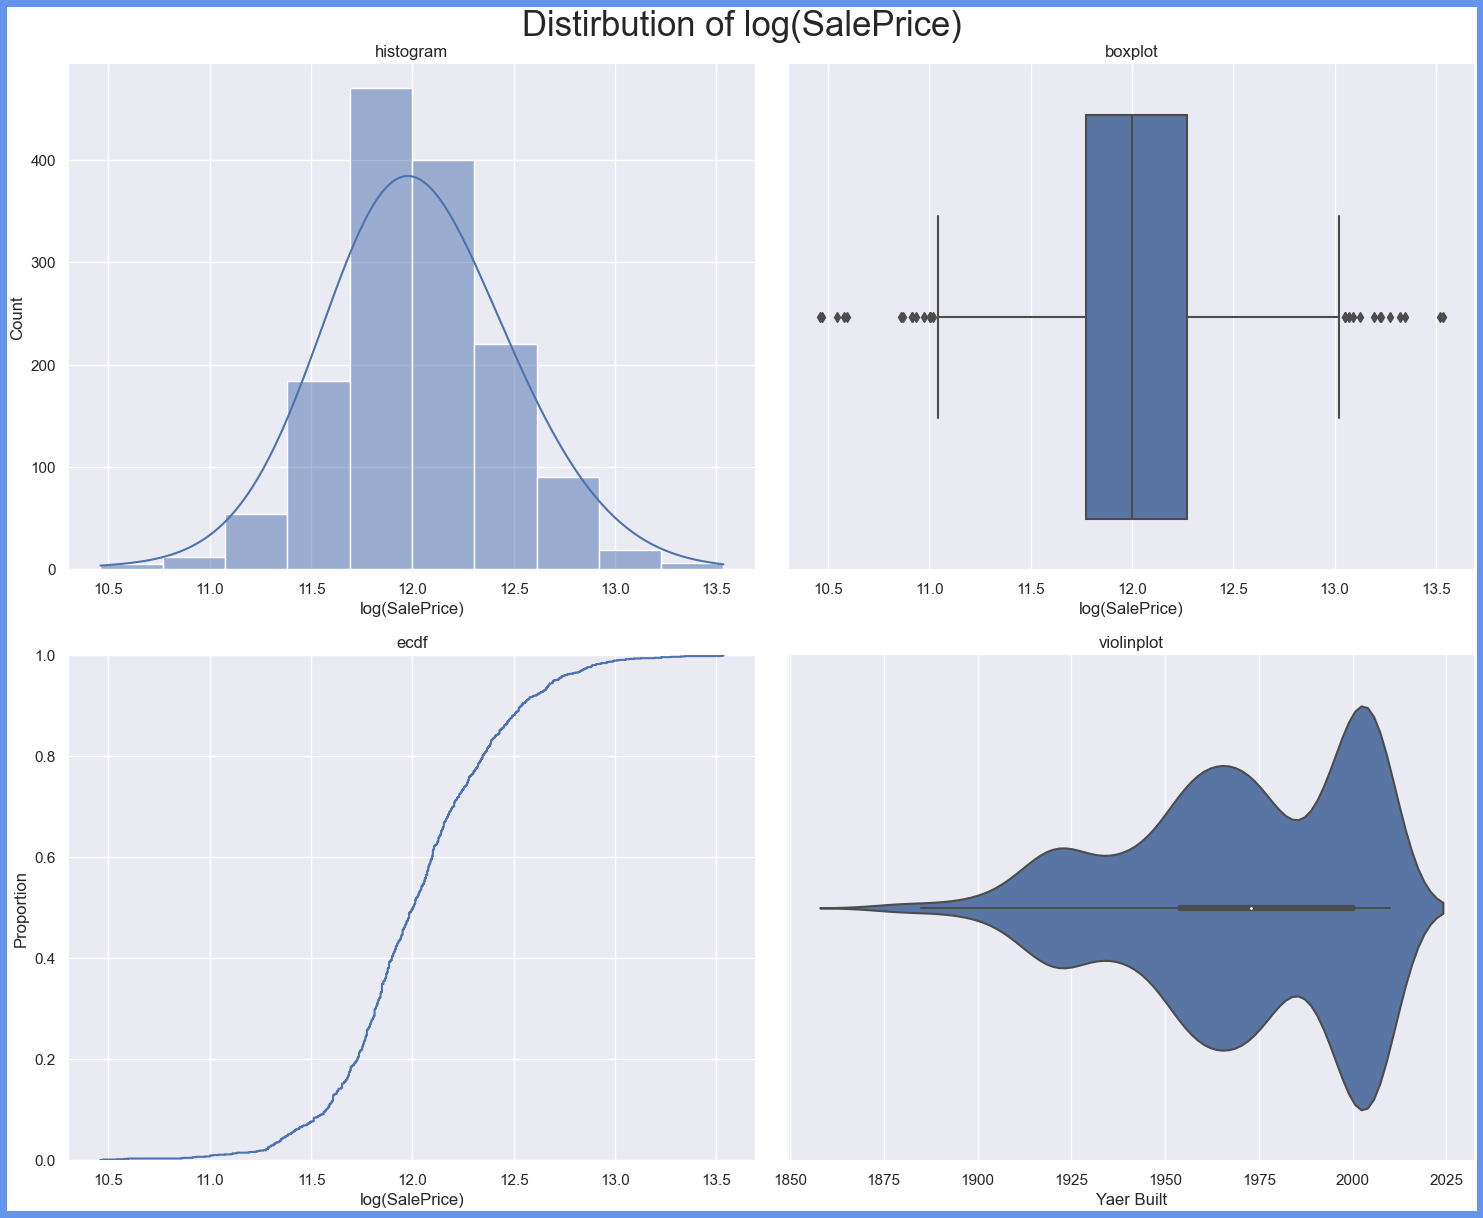

In [21]:
# Distribution of target variable
univariate_numerical_plot_2(Xy,'log(SalePrice)')

#### Year Built

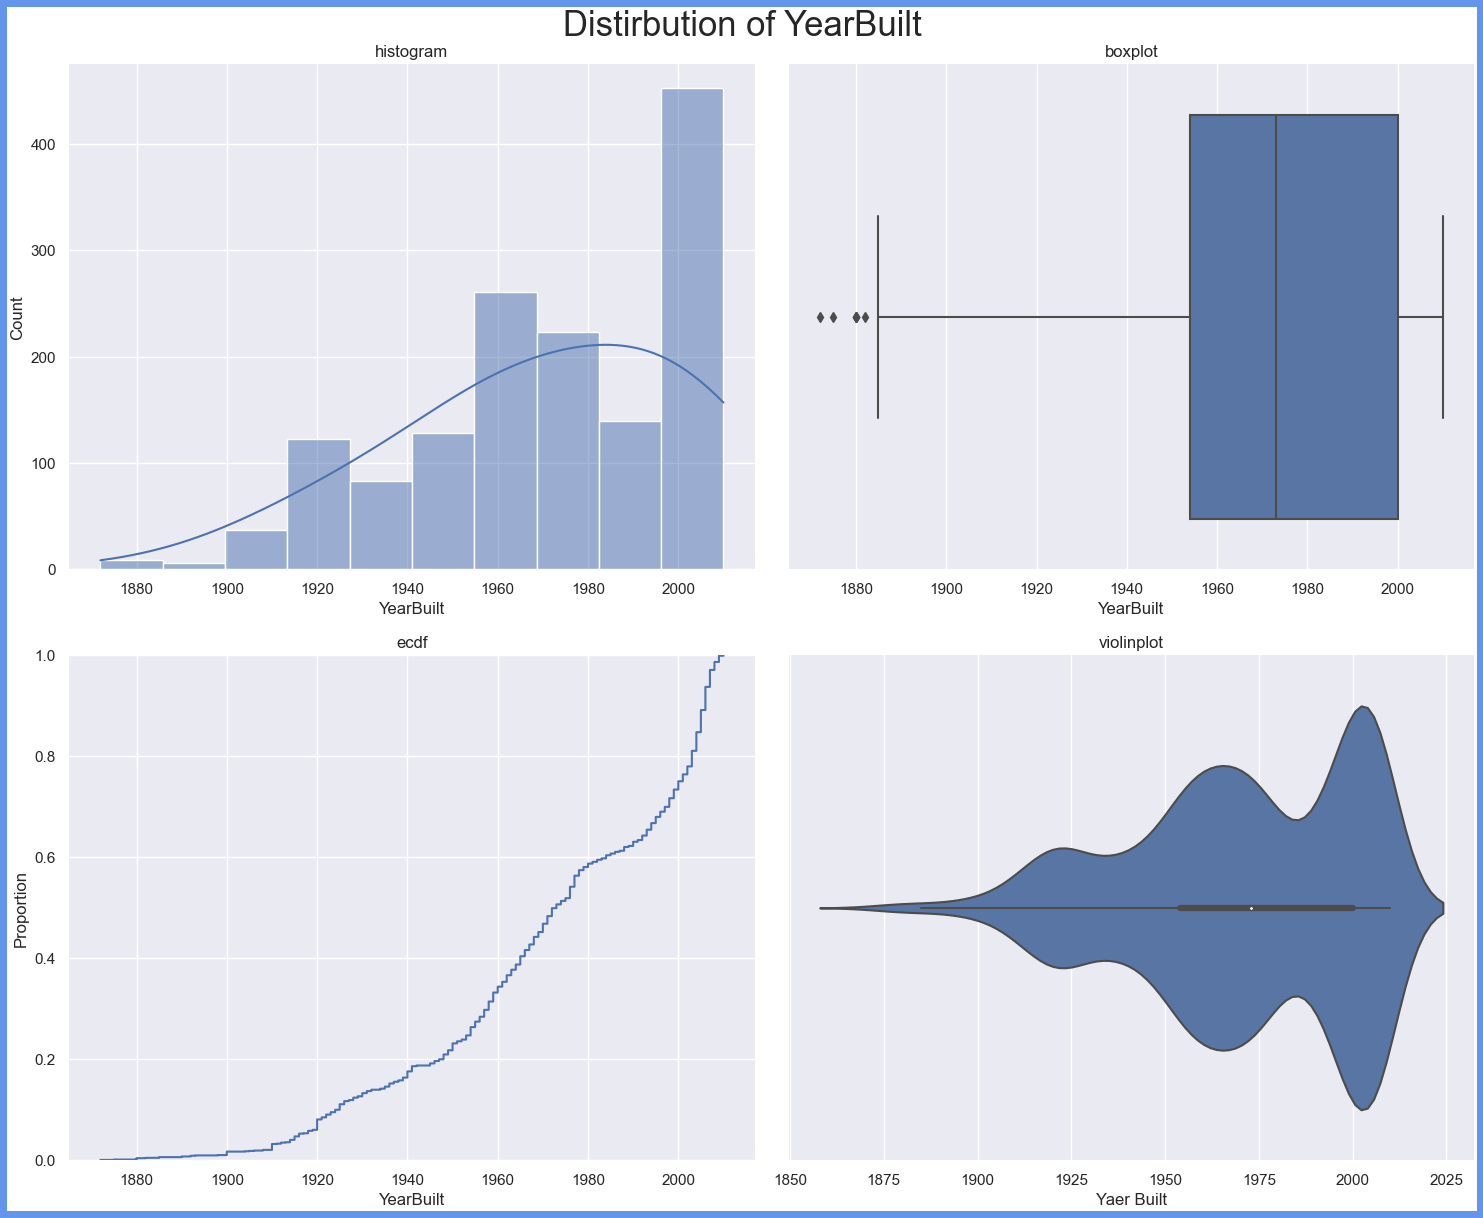

In [22]:
univariate_numerical_plot_2(house, 'YearBuilt')

In [23]:
X[['YearBuilt']].describe().round(decimals =2).T

count     mean   std     min     25%     50%     75%     max
YearBuilt  1460.0  1971.27  30.2  1872.0  1954.0  1973.0  2000.0  2010.0

#### Year Remodeled

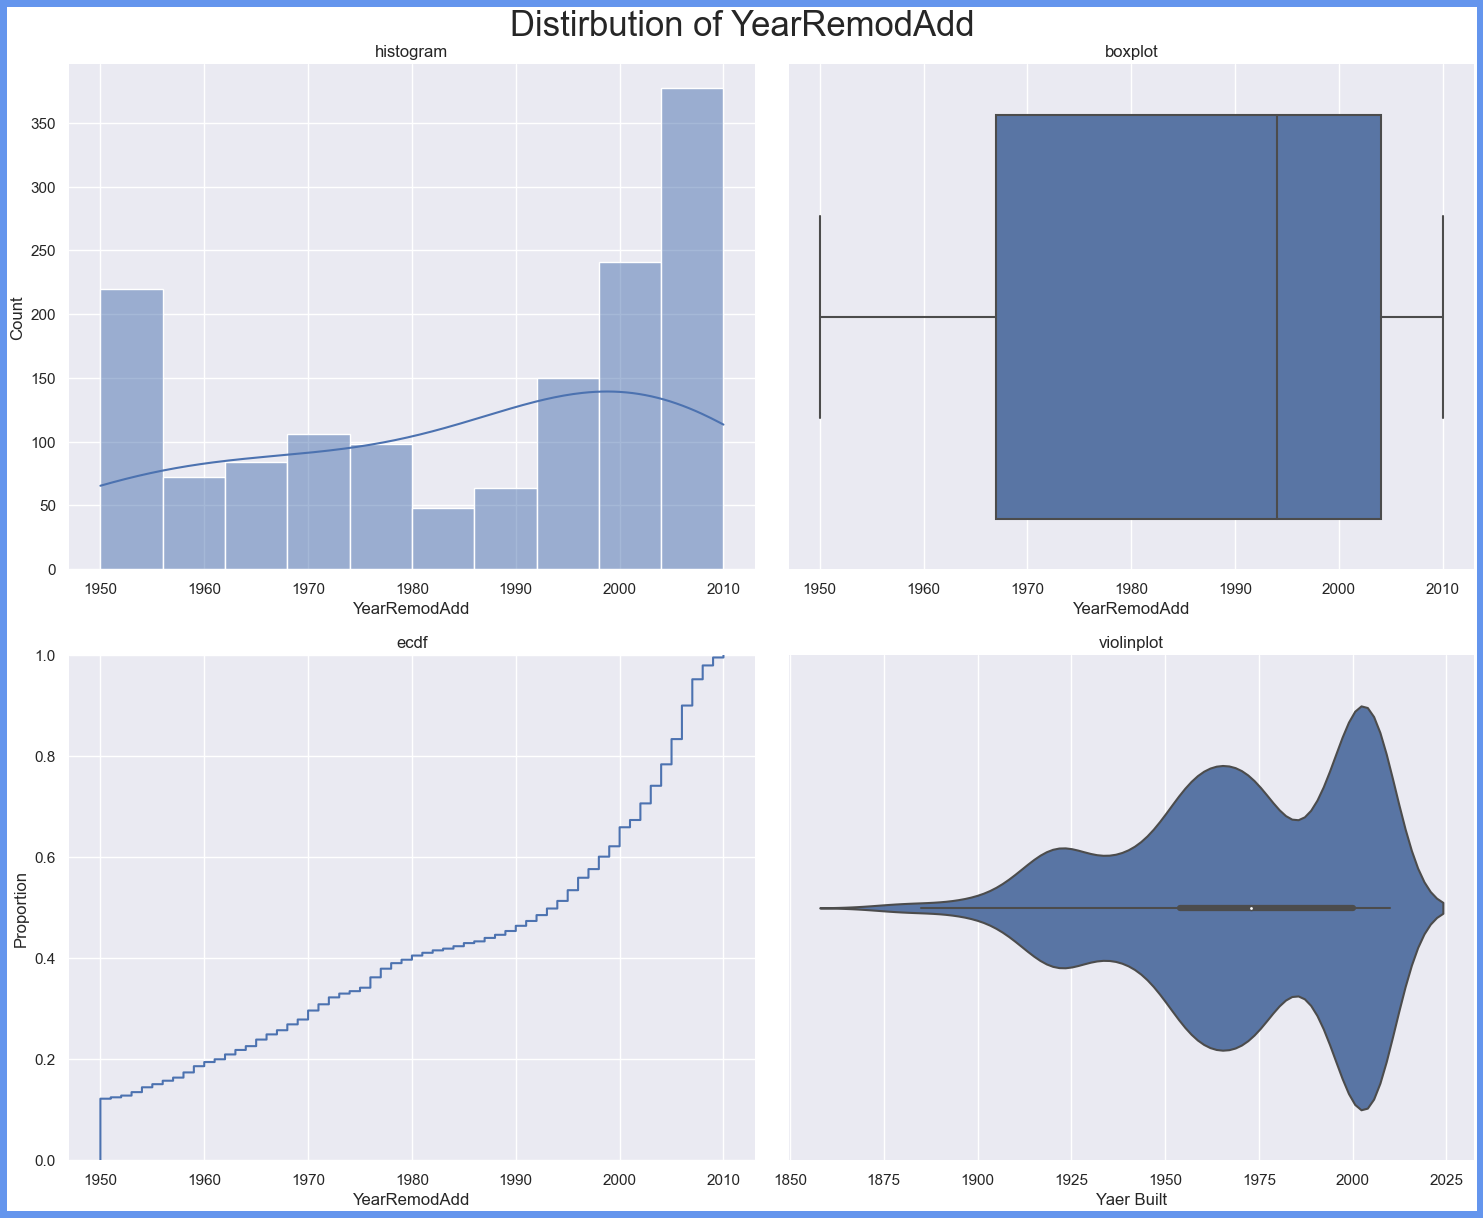

In [24]:
univariate_numerical_plot_2(house, 'YearRemodAdd')

In [25]:
X[['YearRemodAdd']].describe().round(decimals =2).T

count     mean    std     min     25%     50%     75%     max
YearRemodAdd  1460.0  1984.87  20.65  1950.0  1967.0  1994.0  2004.0  2010.0

# 3) Categorical Attributes <a id="NumAtt"></a>

In [26]:
# Lsit of categorical attributes
X.select_dtypes(include = ['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
house_cat_att = house.select_dtypes(include = ['object'])

In [28]:
info_cat = pd.DataFrame(house_cat_att.dtypes, columns = ['Dtype'])
info_cat['Unique'] = house_cat_att.nunique().values
info_cat['Null'] = house_cat_att.isnull().sum().values
info_cat.sort_values(by = ['Null'], inplace = True, ascending = False)

info_cat

Dtype  Unique  Null
PoolQC         object       3  1453
MiscFeature    object       4  1406
Alley          object       2  1369
Fence          object       4  1179
FireplaceQu    object       5   690
GarageType     object       6    81
GarageCond     object       5    81
GarageQual     object       5    81
GarageFinish   object       3    81
BsmtFinType2   object       6    38
BsmtExposure   object       4    38
BsmtFinType1   object       6    37
BsmtQual       object       4    37
BsmtCond       object       4    37
MasVnrType     object       4     8
Electrical     object       5     1
Functional     object       7     0
KitchenQual    object       4     0
CentralAir     object       2     0
HeatingQC      object       5     0
Heating        object       6     0
PavedDrive     object       3     0
SaleType       object       9     0
MSZoning       object       5     0
Street         object       2     0
Condition2     object       8     0
LotShape       object       4     0
LandContour    object       4     0
Utilities      object       2     0
LotConfig      object       5     0
LandSlope      object       3     0
Neighborhood   object      25     0
Condition1     object       9     0
BldgType       object       5     0
Foundation     object       6     0
HouseStyle     object       8     0
RoofStyle      object       6     0
RoofMatl       object       8     0
Exterior1st    object      15     0
Exterior2nd    object      16     0
ExterQual      object       4     0
ExterCond      object       5     0
SaleCondition  object       6     0

In [29]:
object_cols = X.select_dtypes('object').columns
len(object_cols)

43

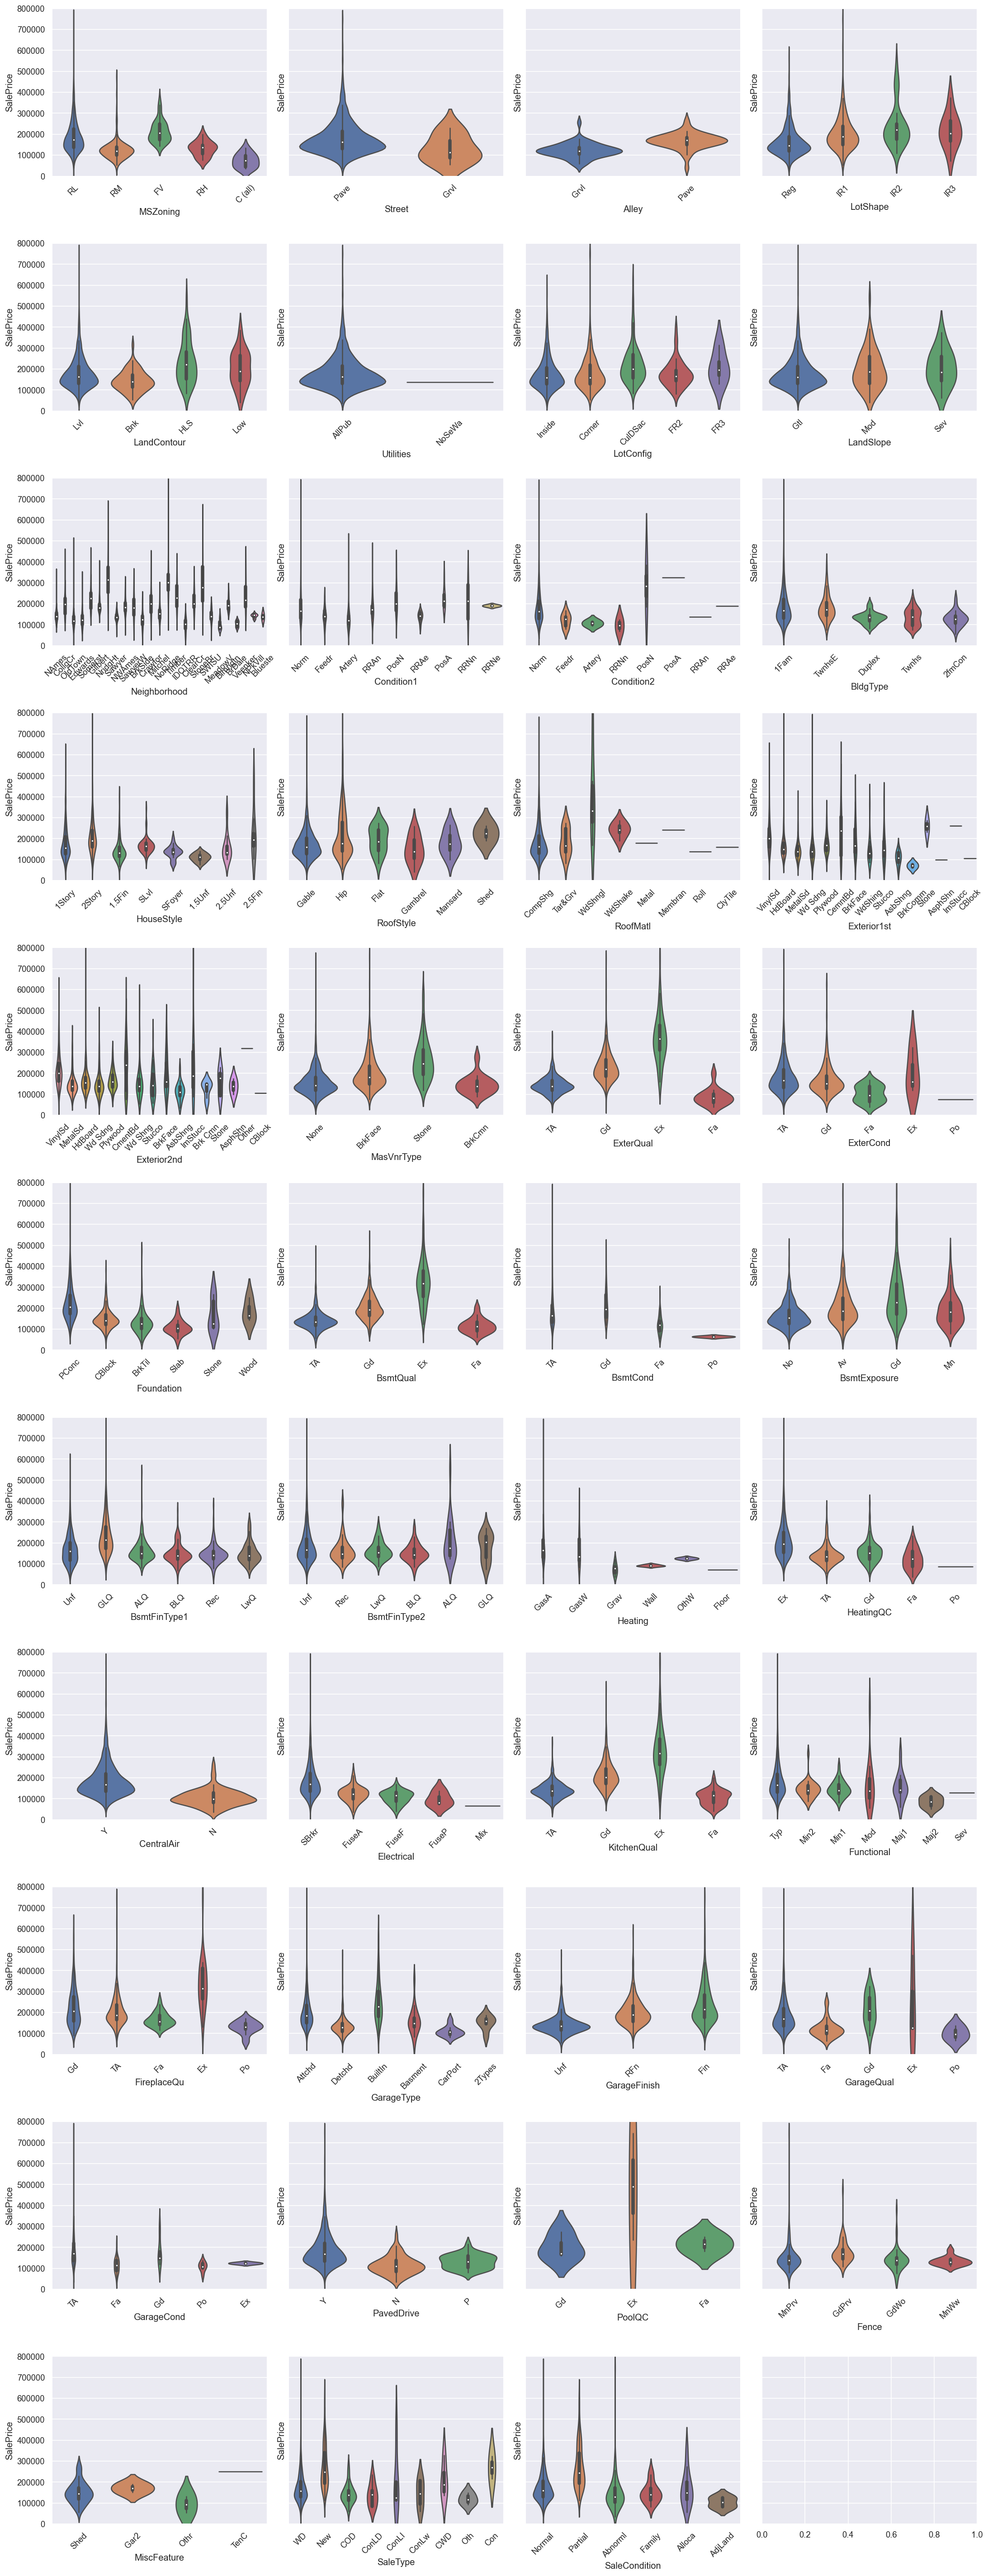

In [30]:

fig, ax = plt.subplots(nrows=ceil(len(object_cols) / 4), ncols=4, figsize=(22, 1.4*len(object_cols)), sharey=True, dpi=120)

for col, subplot in zip(object_cols, ax.flatten()):
    freq = house[col].value_counts()
    subplot.ticklabel_format(style='plain')
    plt.ylim([0, 800000])
    plt.subplots_adjust(wspace=.1,hspace=.4)
    for tick in subplot.get_xticklabels():
        tick.set_rotation(45)
        
    sns.violinplot(data=house, x=col, y=y, order=freq.index, ax=subplot)

In [31]:
house.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [32]:
house_test.Utilities.value_counts()

AllPub    1457
Name: Utilities, dtype: int64

From above violin plots, **'Utilities'** feature seemed to have mostly one category, so we can drop it.

In [33]:
house['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

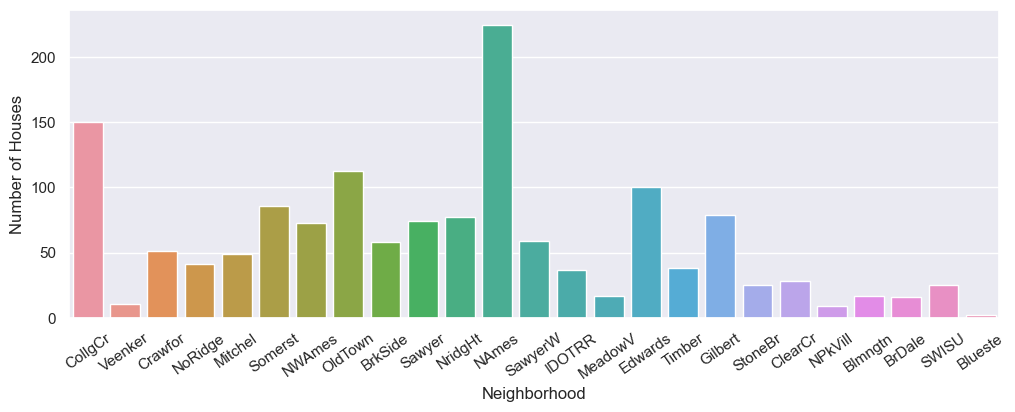

In [34]:
fig = plt.figure(figsize=(12,4))
sns.countplot(x = 'Neighborhood', data = house)
plt.xticks(rotation = 35)
plt.ylabel('Number of Houses')
plt.show()

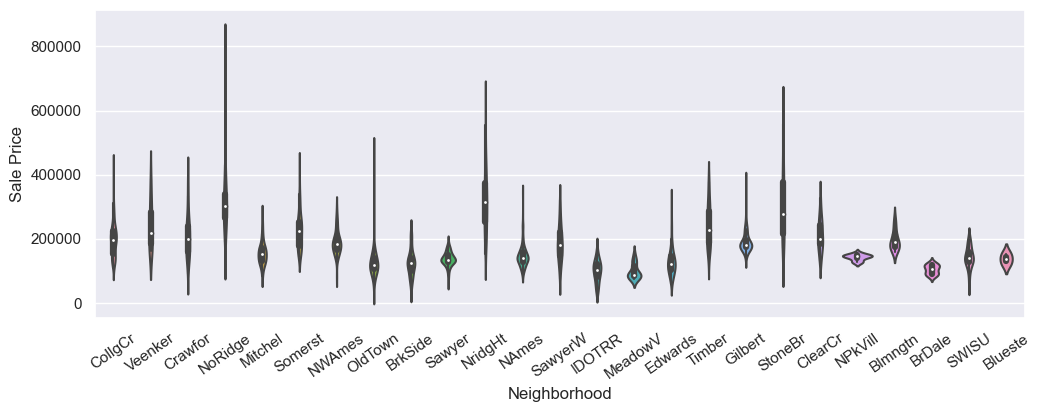

In [35]:
fig = plt.figure(figsize=(12,4))
sns.violinplot(x = 'Neighborhood', y = 'SalePrice', data = house)
plt.xticks(rotation = 35)
plt.ylabel('Sale Price')
plt.show()

In [36]:
house.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).round(3)

Neighborhood
NoRidge    335295.317
NridgHt    316270.623
StoneBr    310499.000
Timber     242247.447
Veenker    238772.727
Somerst    225379.837
ClearCr    212565.429
Crawfor    210624.725
CollgCr    197965.773
Blmngtn    194870.882
Gilbert    192854.506
NWAmes     189050.068
SawyerW    186555.797
Mitchel    156270.122
NAmes      145847.080
NPkVill    142694.444
SWISU      142591.360
Blueste    137500.000
Sawyer     136793.135
OldTown    128225.301
Edwards    128219.700
BrkSide    124834.052
BrDale     104493.750
IDOTRR     100123.784
MeadowV     98576.471
Name: SalePrice, dtype: float64

In [37]:
house['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [38]:
sns.set()
fig, ax = plt.subplots(1, 2, figsize = (20,6), dpi = 100)

sns.countplot(data = house, x = 'HouseStyle', ax = ax[0])
ax[0].set_title('Countplot')
ax[0].set_xlabel(xlabel = 'House Style')


sns.boxplot(x = house['HouseStyle'], y = house['SalePrice'], data = house, ax= ax[1])
ax[1].set_title('Boxplot')
ax[1].set_xlabel(xlabel = 'House Style')

plt.show()

**'2Story'** houses have the highest variability in prices and they tend to be more expensive, while **'1.5Unf'** houses are the sheapest one.

# 4)  Data Cleaning <a id = "DataCleaning"></a>

In [39]:
# Making function so that we can reuse it in later stages as well
def show_null_values(X, X_test):
    # Missing values in each column of Training and Testing data
    null_values_train = X.isnull().sum()
    null_values_test = X_test.isnull().sum()

    # Making DataFrame for combining training and testing missing values
    null_values = pd.DataFrame(null_values_train)
    null_values['Test Data'] = null_values_test.values
    null_values.rename(columns = {0:'Train Data'}, inplace = True)

    # Showing only columns having missing values and sorting them
    null_values = null_values.loc[(null_values['Train Data']!=0) | (null_values['Test Data']!=0)]
    null_values = null_values.sort_values(by=['Train Data','Test Data'],ascending=False)
    
    print("Total miising values:",null_values.sum(),sep='\n')
    
    return null_values

In [40]:
show_null_values(X, house_test)

Total miising values:
Train Data    6965
Test Data     7000
dtype: int64


Train Data  Test Data
PoolQC              1453       1456
MiscFeature         1406       1408
Alley               1369       1352
Fence               1179       1169
FireplaceQu          690        730
LotFrontage          259        227
GarageYrBlt           81         78
GarageFinish          81         78
GarageQual            81         78
GarageCond            81         78
GarageType            81         76
BsmtExposure          38         44
BsmtFinType2          38         42
BsmtCond              37         45
BsmtQual              37         44
BsmtFinType1          37         42
MasVnrType             8         16
MasVnrArea             8         15
Electrical             1          0
MSZoning               0          4
Utilities              0          2
BsmtFullBath           0          2
BsmtHalfBath           0          2
Functional             0          2
Exterior1st            0          1
Exterior2nd            0          1
BsmtFinSF1             0          1
BsmtFinSF2             0          1
BsmtUnfSF              0          1
TotalBsmtSF            0          1
KitchenQual            0          1
GarageCars             0          1
GarageArea             0          1
SaleType               0          1

In [41]:
# Columns with missing values in more than half number of rows
null_cols = null_cols = [col for col in X.columns if X[col].isnull().sum() > len(X)/2]
null_cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

We should drop these columns.

## 4.1) Missing Values into Numerical Attributes<a  id = "MissValNum" ></a>

We should drop the **null_cols**.

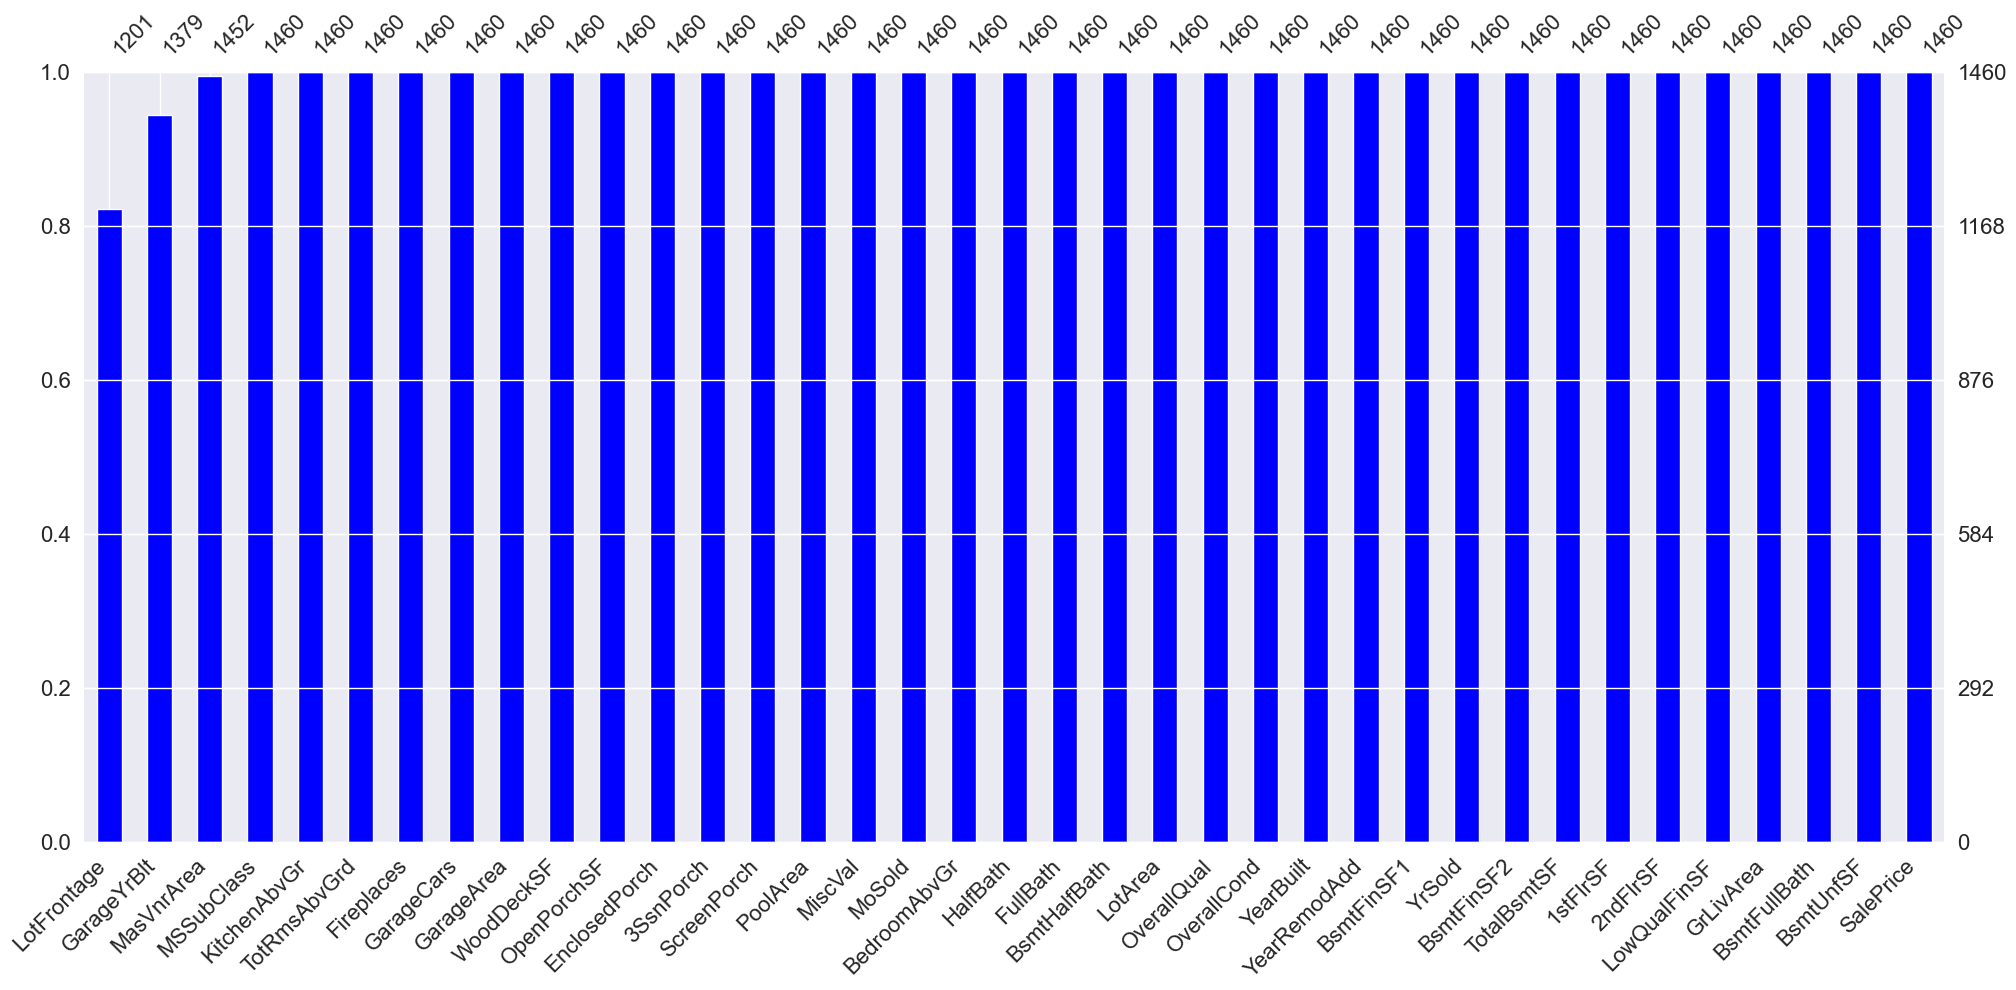

In [42]:
msno.bar(house_num_att, color = 'blue', sort = 'ascending');

There are three features from Numerical Attributes that have missing values:
* **'LotFrontage'**  - Linear feet of street connected to property
* **'GarageYrBlt'** - Year garage was built
* **'MasVnrArea'** - Masonry veneer area in square feet

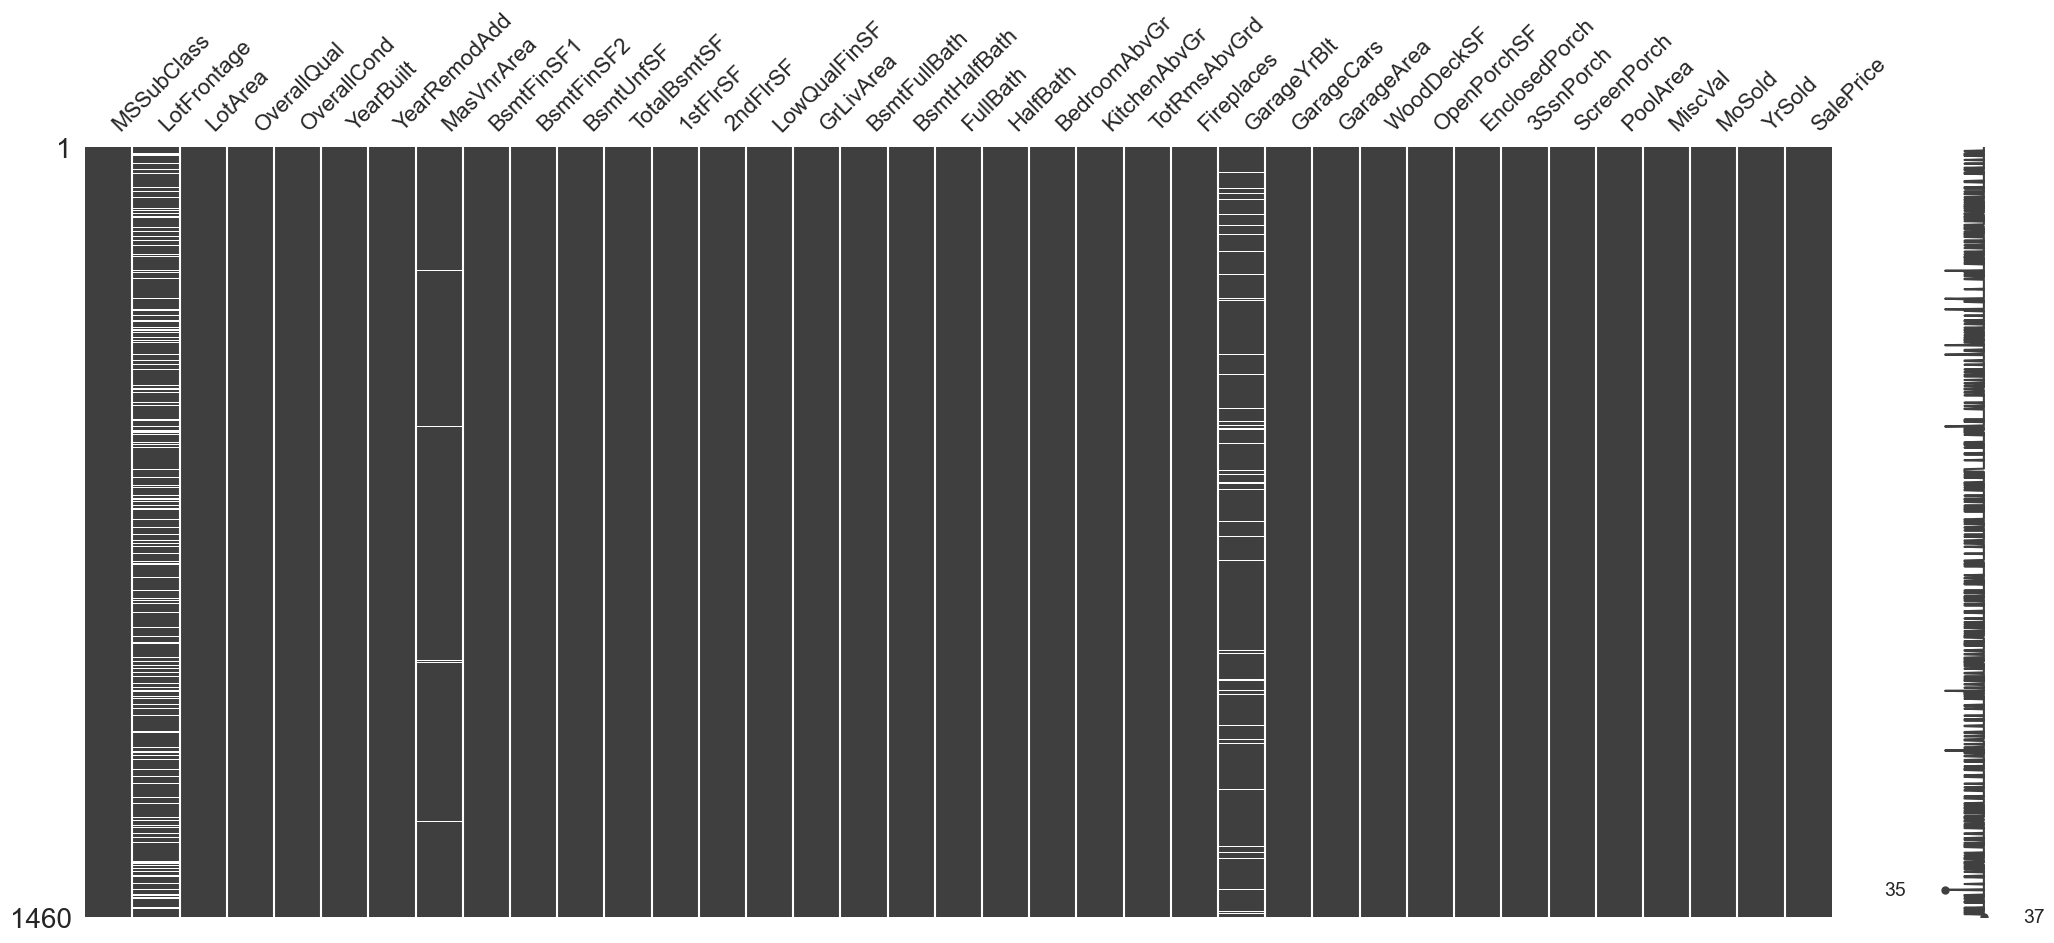

In [43]:
# Find a pattern thought missing values if it exists.
msno.matrix(house_num_att);

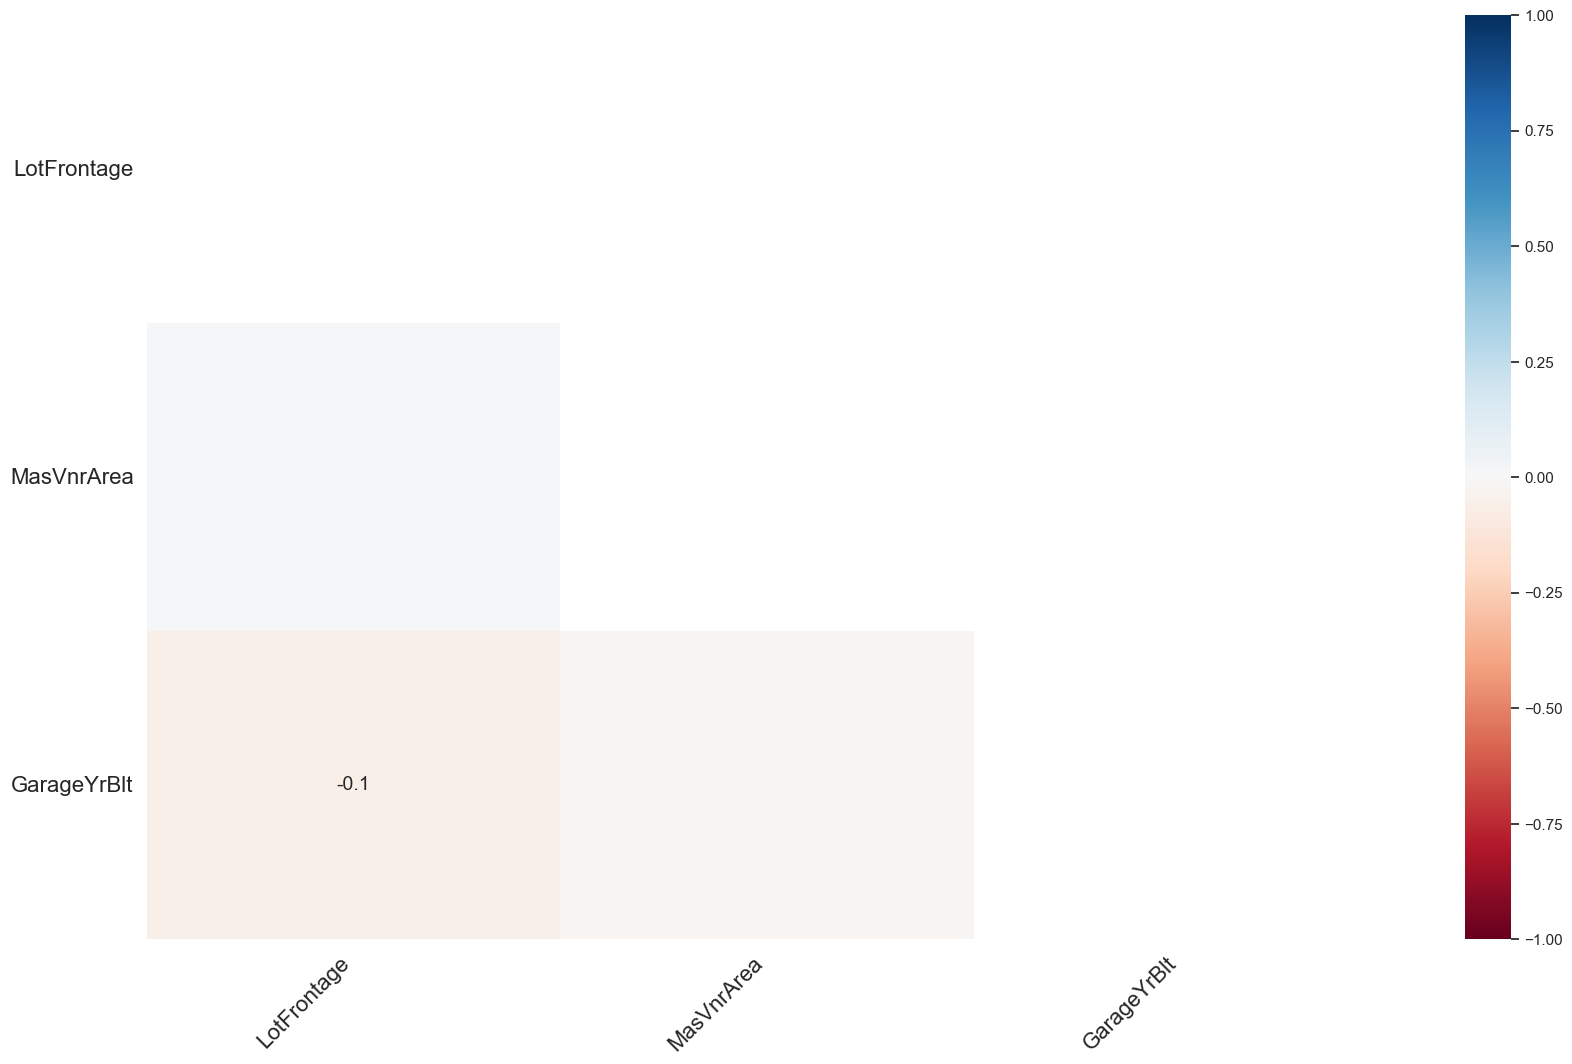

In [44]:
# The heatmap is used to identify if there is a relationship in the presence of null values
# between each of the columns
msno.heatmap(house_num_att);

Value = -0.1 show that there is little to no relationship between the presence of null values in one column compared to another.

## 4.1.1) Fixing Missing Values<a id = "FixMissValAtt"></a>

In [45]:
# Mean Imputation
num_att_mean = house_num_att.copy(deep = True)
mean_imputer = SimpleImputer(strategy = 'mean')
num_att_mean.iloc[:,:] = mean_imputer.fit_transform(num_att_mean)


# Median Imputation
num_att_median = house_num_att.copy(deep = True)
median_imputer = SimpleImputer(strategy = 'median')
num_att_median.iloc[:,:] = median_imputer.fit_transform(num_att_median)


# Imputing mode
num_att_mode = house_num_att.copy()
mode_imputer = SimpleImputer(strategy = 'most_frequent')
num_att_mode.iloc[:,:] = mode_imputer.fit_transform(num_att_mode)


# Imputing constant
num_att_const = house_num_att.copy()
const_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)
num_att_const.iloc[:,:] = const_imputer.fit_transform(num_att_const)


#### 'MasVnrArea'

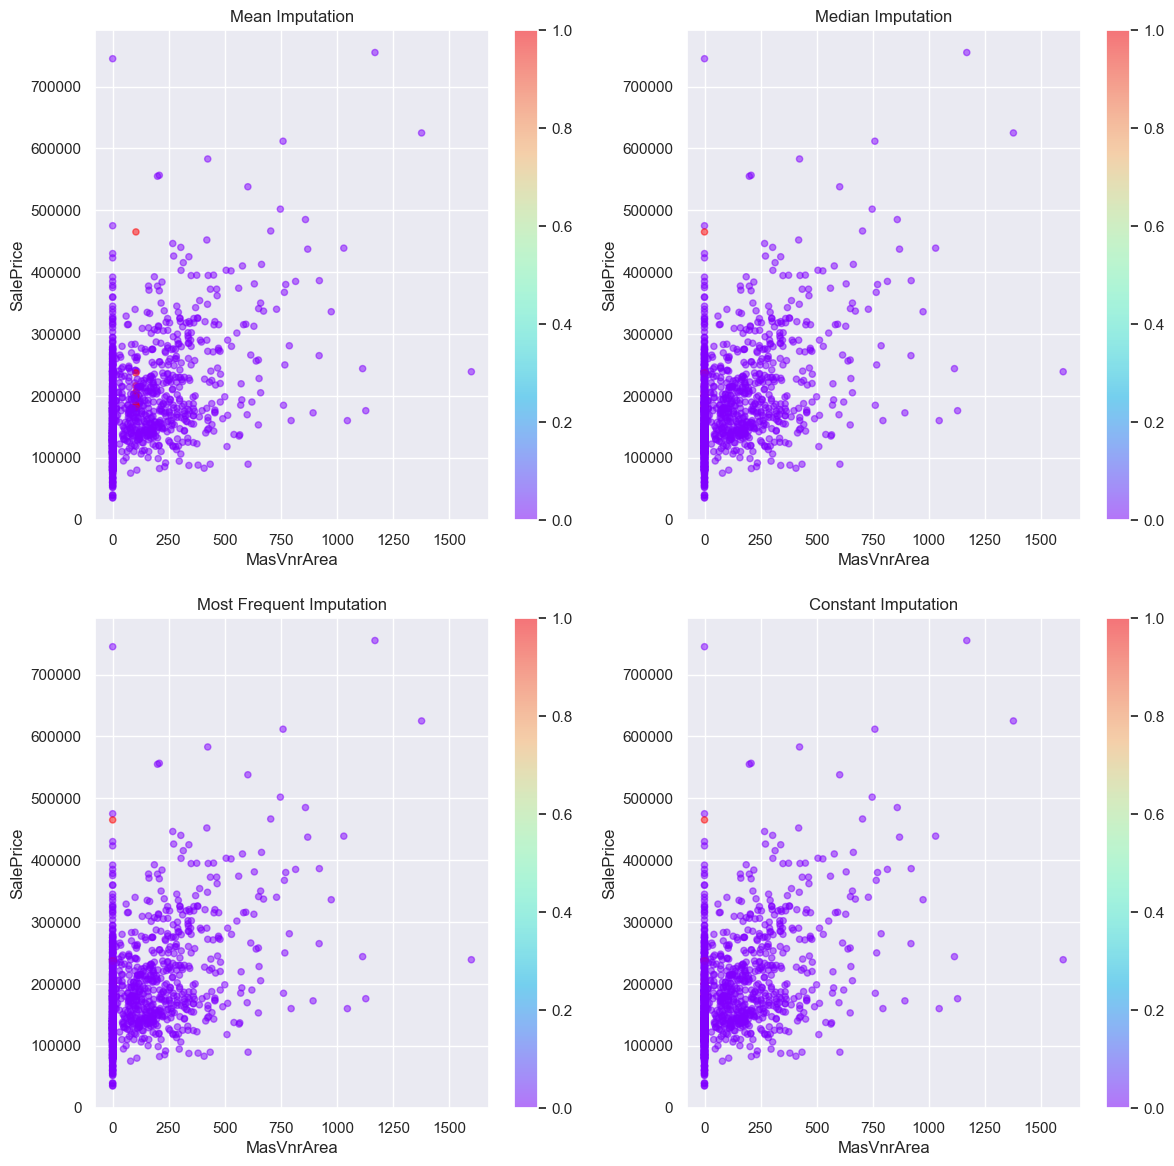

In [46]:
fig, axes = plt.subplots(2,2, figsize = (14,14))
nullity = house_num_att['MasVnrArea'].isnull() + house['SalePrice'].isnull()

imputations = {'Mean Imputation' : num_att_mean,
              'Median Imputation' : num_att_median,
              'Most Frequent Imputation' : num_att_mode,
              'Constant Imputation' : num_att_const}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x = 'MasVnrArea', y= 'SalePrice', kind = 'scatter', alpha = 0.5,
                           c = nullity, cmap = 'rainbow', ax=ax, title =df_key)
    
plt.show()

**'MasVnrArea'** replace with constant = 0.

#### 'LotFrontage'

In [47]:
fig, axes = plt.subplots(2,2, figsize = (14,14))
nullity = house_num_att['LotFrontage'].isnull() + house['SalePrice'].isnull()

imputations = {'Mean Imputation' : num_att_mean,
              'Median Imputation' : num_att_median,
              'Most Frequent Imputation' : num_att_mode,
              'Constant Imputation' : num_att_const}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x = 'LotFrontage', y= 'SalePrice', kind = 'scatter', alpha = 0.5,
                           c = nullity, cmap = 'rainbow', ax=ax, title =df_key)
    
plt.show()

In [48]:
# Look at LotFrontage again
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
# Compute the median LootFrontage for all houses in the same neighbourhood

data_pom = Xy.copy()
data_pom['LotFrontage'] = data_pom.groupby("Neighborhood")["LotFrontage"].transform(
        lambda x: x.fillna(x.median()))

nullity = Xy['LotFrontage'].isnull() + Xy['SalePrice'].isnull()
data_pom.plot(x = 'LotFrontage', y = 'SalePrice', kind = 'scatter', alpha = 0.5, c = nullity,
                  cmap = 'rainbow', title = 'Median grouping Imputation')
plt.show()

In [49]:
#Advance imputation KNN
knn_imputer = KNN()

num_att_knn = house_num_att.copy()
num_att_knn.iloc[:,:] = knn_imputer.fit_transform(num_att_knn)

Imputing row 1/1460 with 0 missing, elapsed time: 0.266
Imputing row 101/1460 with 1 missing, elapsed time: 0.266
Imputing row 201/1460 with 0 missing, elapsed time: 0.267
Imputing row 301/1460 with 0 missing, elapsed time: 0.267
Imputing row 401/1460 with 0 missing, elapsed time: 0.267
Imputing row 501/1460 with 0 missing, elapsed time: 0.267
Imputing row 601/1460 with 0 missing, elapsed time: 0.268
Imputing row 701/1460 with 0 missing, elapsed time: 0.268
Imputing row 801/1460 with 0 missing, elapsed time: 0.268
Imputing row 901/1460 with 1 missing, elapsed time: 0.269
Imputing row 1001/1460 with 0 missing, elapsed time: 0.269
Imputing row 1101/1460 with 0 missing, elapsed time: 0.269
Imputing row 1201/1460 with 0 missing, elapsed time: 0.270
Imputing row 1301/1460 with 1 missing, elapsed time: 0.270
Imputing row 1401/1460 with 0 missing, elapsed time: 0.270


In [50]:
nullity = house['LotFrontage'].isnull() + house['SalePrice'].isnull()
num_att_knn.plot(x = 'LotFrontage', y = 'SalePrice', kind = 'scatter', alpha = 0.5, c = nullity,
                  cmap = 'rainbow', title = 'KNN Imputation')
plt.show()

In [51]:
MICE_imputer = IterativeImputer()
num_att_MICE = house_num_att.copy()

num_att_MICE.iloc[:,:] = MICE_imputer.fit_transform(num_att_MICE)

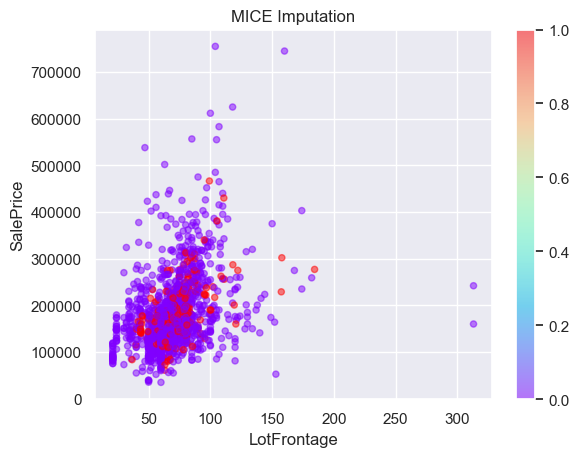

In [52]:
nullity = house['LotFrontage'].isnull() + house['SalePrice'].isnull()
num_att_MICE.plot(x = 'LotFrontage', y = 'SalePrice', kind = 'scatter', alpha = 0.5, c = nullity,
                  cmap = 'rainbow', title = 'MICE Imputation')
plt.show()

**'LotFrontage'** replace with median grouping imputation.

#### 'GarageYrBlt'

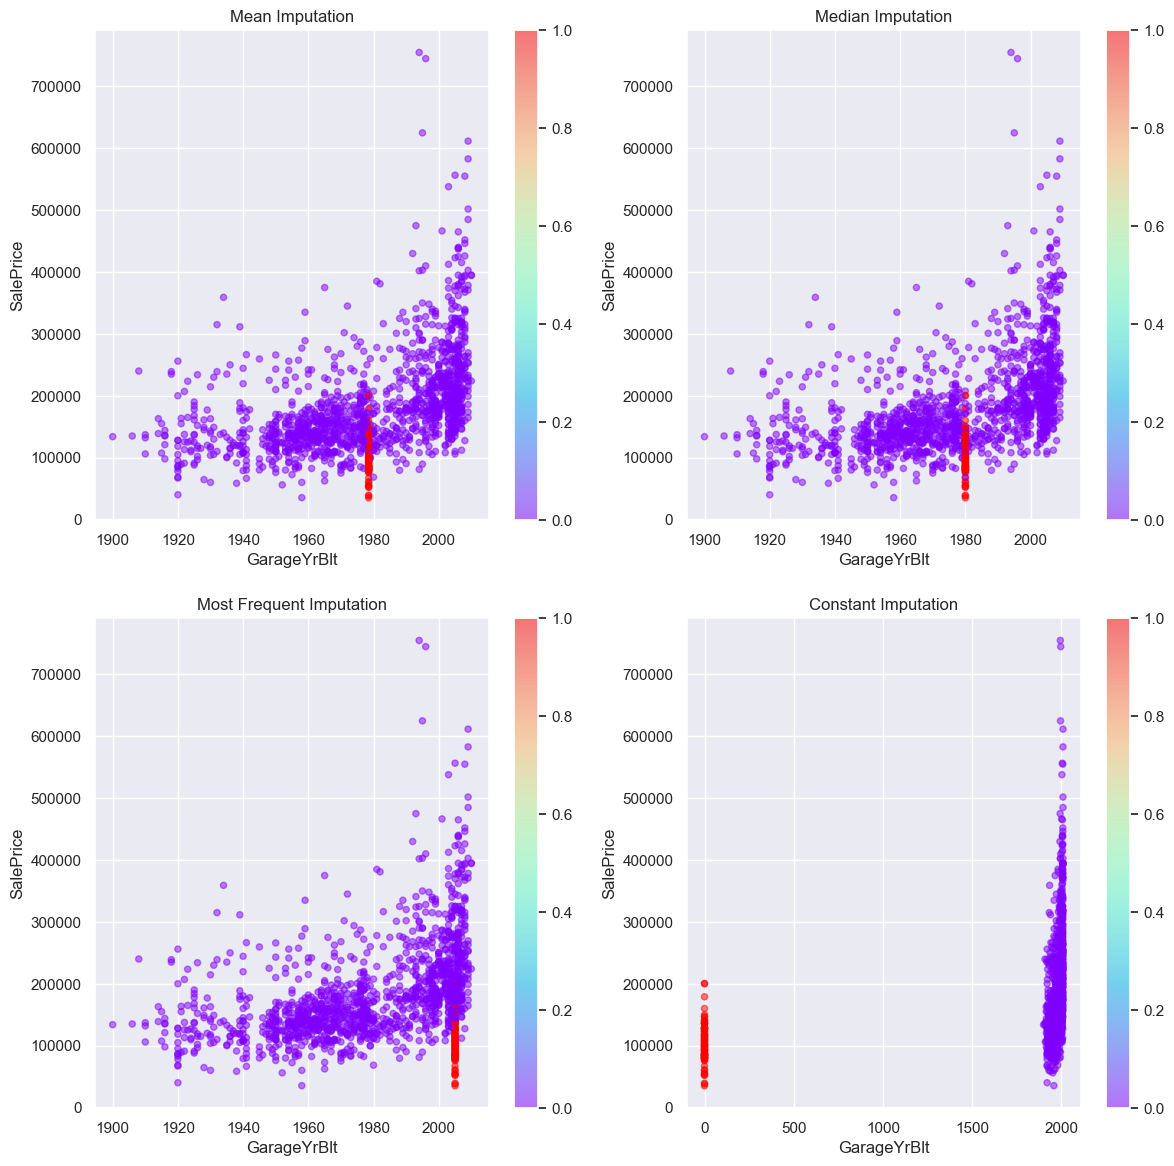

In [53]:
fig, axes = plt.subplots(2,2, figsize = (14,14))
nullity = house_num_att['GarageYrBlt'].isnull() + house_num_att['SalePrice'].isnull()

imputations = {'Mean Imputation' : num_att_mean,
              'Median Imputation' : num_att_median,
              'Most Frequent Imputation' : num_att_mode,
              'Constant Imputation' : num_att_const}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x = 'GarageYrBlt', y= 'SalePrice', kind = 'scatter', alpha = 0.5,
                           c = nullity, cmap = 'rainbow', ax=ax, title =df_key)
    
plt.show()

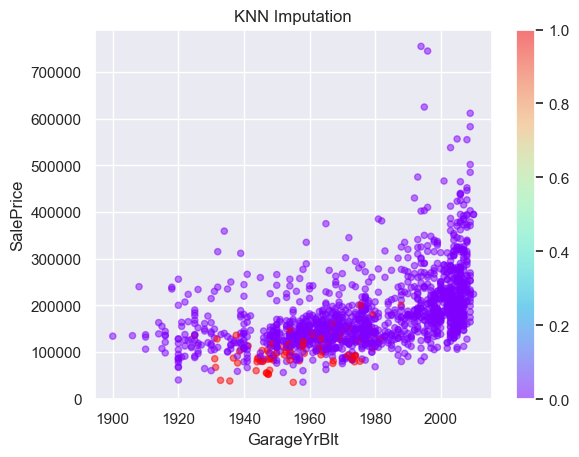

In [54]:
nullity = house['GarageYrBlt'].isnull() + house['SalePrice'].isnull()
num_att_knn.plot(x = 'GarageYrBlt', y = 'SalePrice', kind = 'scatter', alpha = 0.5, c = nullity,
                  cmap = 'rainbow', title = 'KNN Imputation')
plt.show()

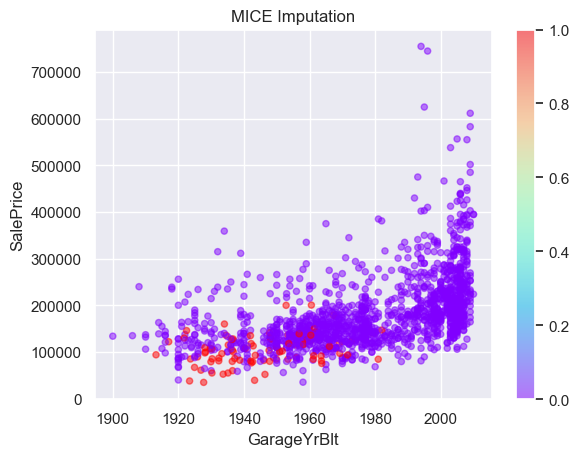

In [55]:
nullity = house['GarageYrBlt'].isnull() + house['SalePrice'].isnull()
num_att_MICE.plot(x = 'GarageYrBlt', y = 'SalePrice', kind = 'scatter', alpha = 0.5, c = nullity,
                  cmap = 'rainbow', title = 'MICE Imputation')
plt.show()

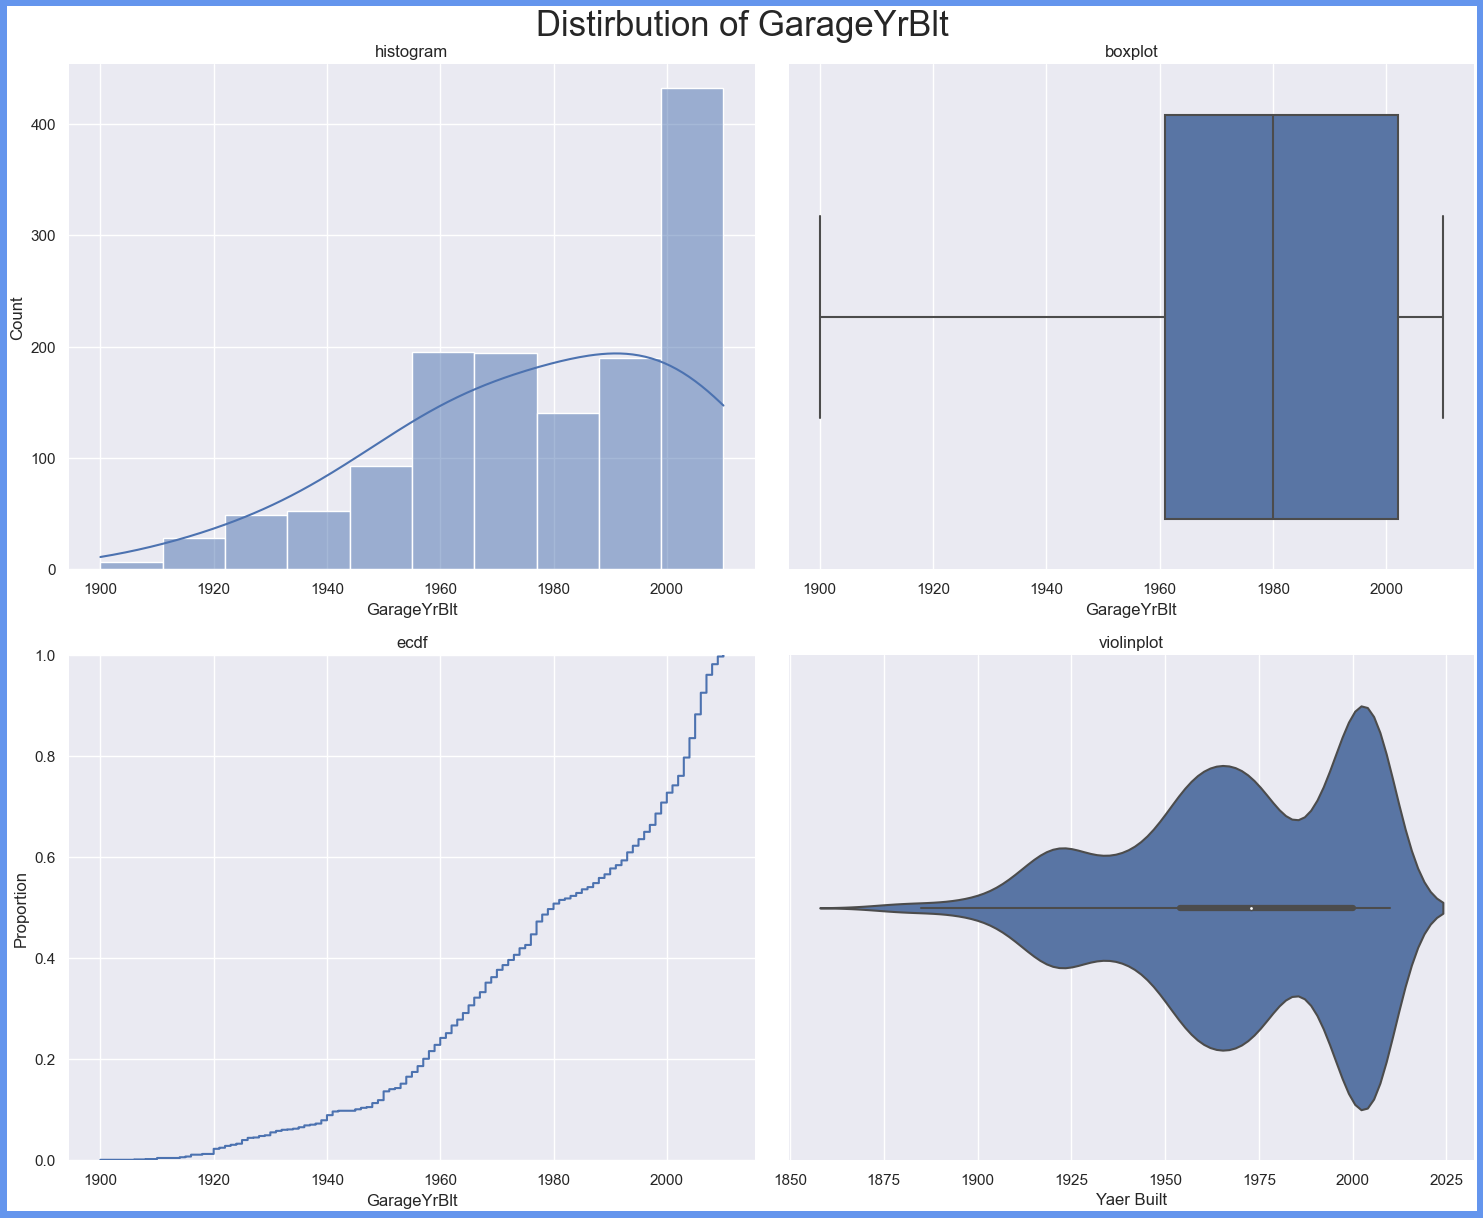

In [56]:
univariate_numerical_plot_2(house, 'GarageYrBlt')

**'GarageYrBlt'** replace with median.

## 4.2) Missing Values into Categorical Attributes <a  id = "MissValCat"></a>

In [57]:
house_cat_att.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                            
1        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2        RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
3        RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4        RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
5        RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

   Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
Id                                                                             
1       CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
2       Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
3       CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
4       Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
5       NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

    ... CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
Id  ...                                                                       
1   ...          Y      SBrkr          Gd        Typ         NaN     Attchd   
2   ...          Y      SBrkr          TA        Typ          TA     Attchd   
3   ...          Y      SBrkr          Gd        Typ          TA     Attchd   
4   ...          Y      SBrkr          Gd        Typ          Gd     Detchd   
5   ...          Y      SBrkr          Gd        Typ          TA     Attchd   

   GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
Id                                                                          
1           RFn         TA         TA          Y    NaN   NaN         NaN   
2           RFn         TA         TA          Y    NaN   NaN         NaN   
3           RFn         TA         TA          Y    NaN   NaN         NaN   
4           Unf         TA         TA          Y    NaN   NaN         NaN   
5           RFn         TA         TA          Y    NaN   NaN         NaN   

   SaleType SaleCondition  
Id                         
1        WD        Normal  
2        WD        Normal  
3        WD        Normal  
4        WD       Abnorml  
5        WD        Normal  

[5 rows x 43 columns]

In [58]:
house_cat_att.describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [59]:
info_cat

Dtype  Unique  Null
PoolQC         object       3  1453
MiscFeature    object       4  1406
Alley          object       2  1369
Fence          object       4  1179
FireplaceQu    object       5   690
GarageType     object       6    81
GarageCond     object       5    81
GarageQual     object       5    81
GarageFinish   object       3    81
BsmtFinType2   object       6    38
BsmtExposure   object       4    38
BsmtFinType1   object       6    37
BsmtQual       object       4    37
BsmtCond       object       4    37
MasVnrType     object       4     8
Electrical     object       5     1
Functional     object       7     0
KitchenQual    object       4     0
CentralAir     object       2     0
HeatingQC      object       5     0
Heating        object       6     0
PavedDrive     object       3     0
SaleType       object       9     0
MSZoning       object       5     0
Street         object       2     0
Condition2     object       8     0
LotShape       object       4     0
LandContour    object       4     0
Utilities      object       2     0
LotConfig      object       5     0
LandSlope      object       3     0
Neighborhood   object      25     0
Condition1     object       9     0
BldgType       object       5     0
Foundation     object       6     0
HouseStyle     object       8     0
RoofStyle      object       6     0
RoofMatl       object       8     0
Exterior1st    object      15     0
Exterior2nd    object      16     0
ExterQual      object       4     0
ExterCond      object       5     0
SaleCondition  object       6     0

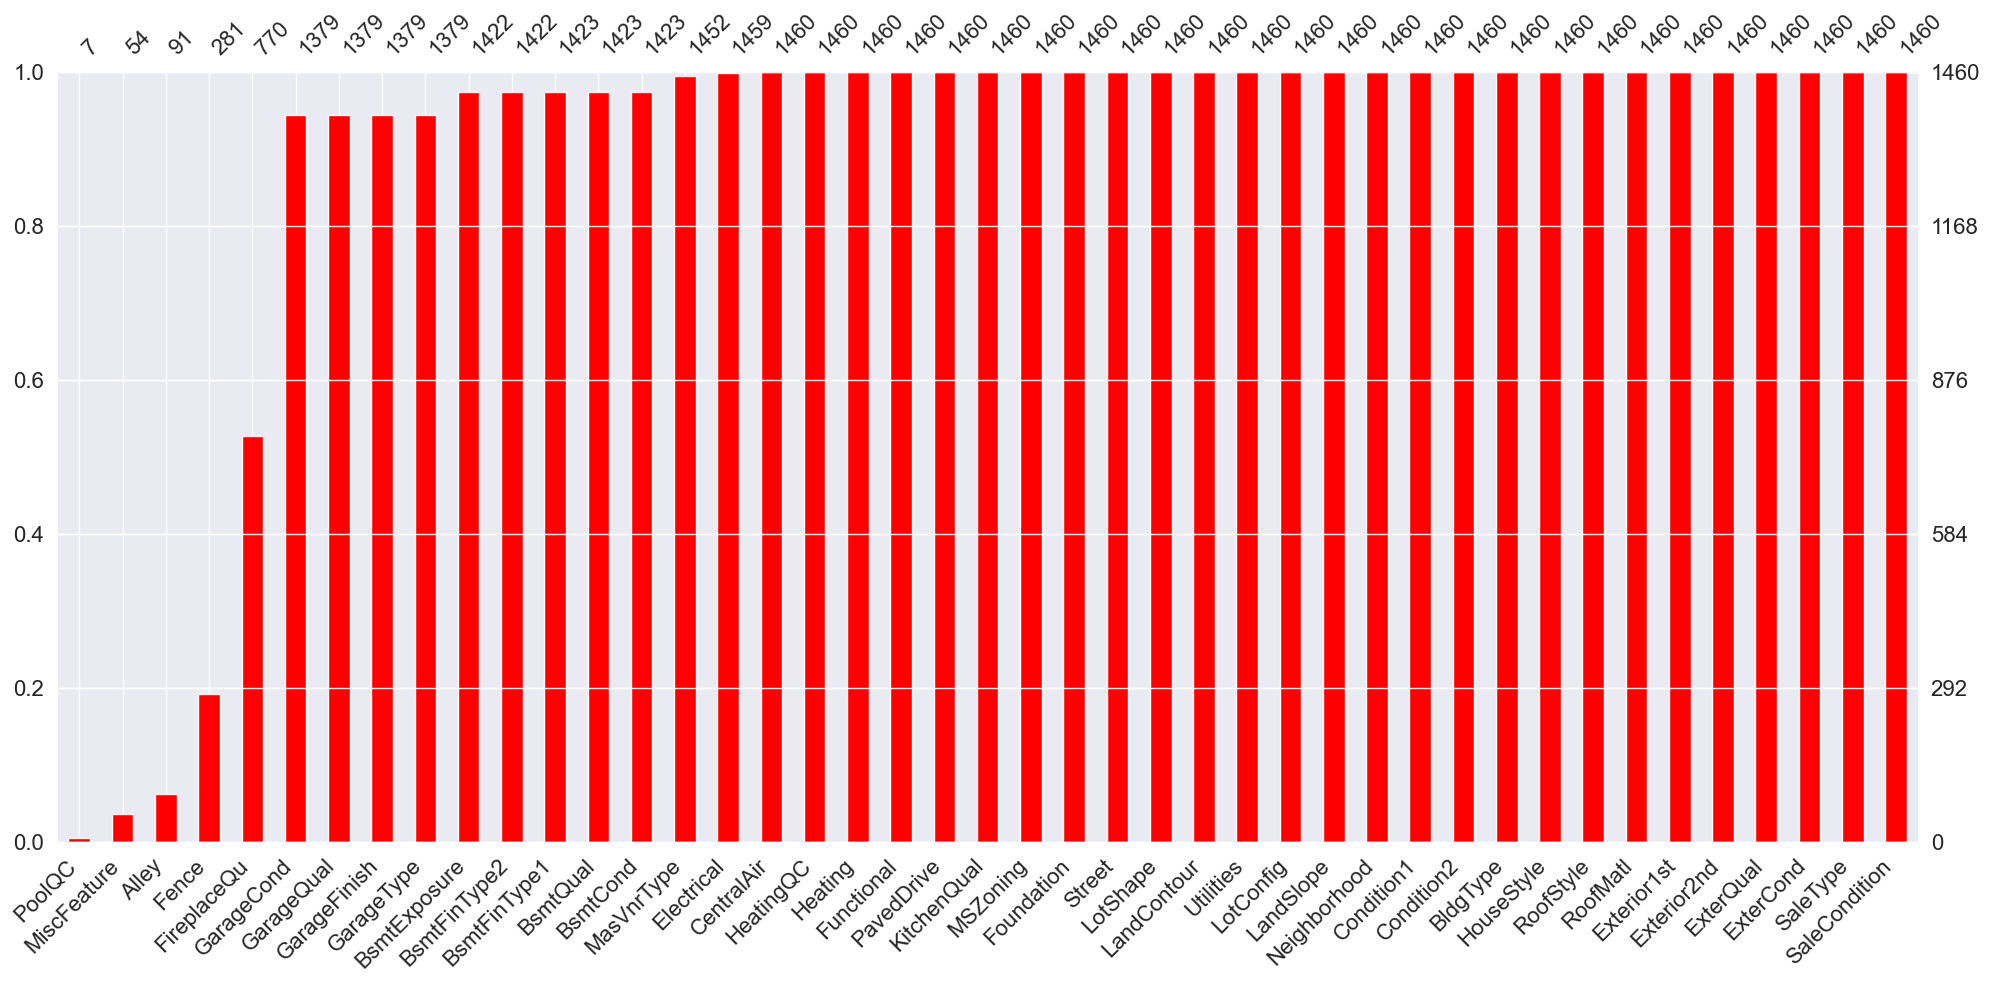

In [60]:
msno.bar(house_cat_att, color = 'red', sort = 'ascending');

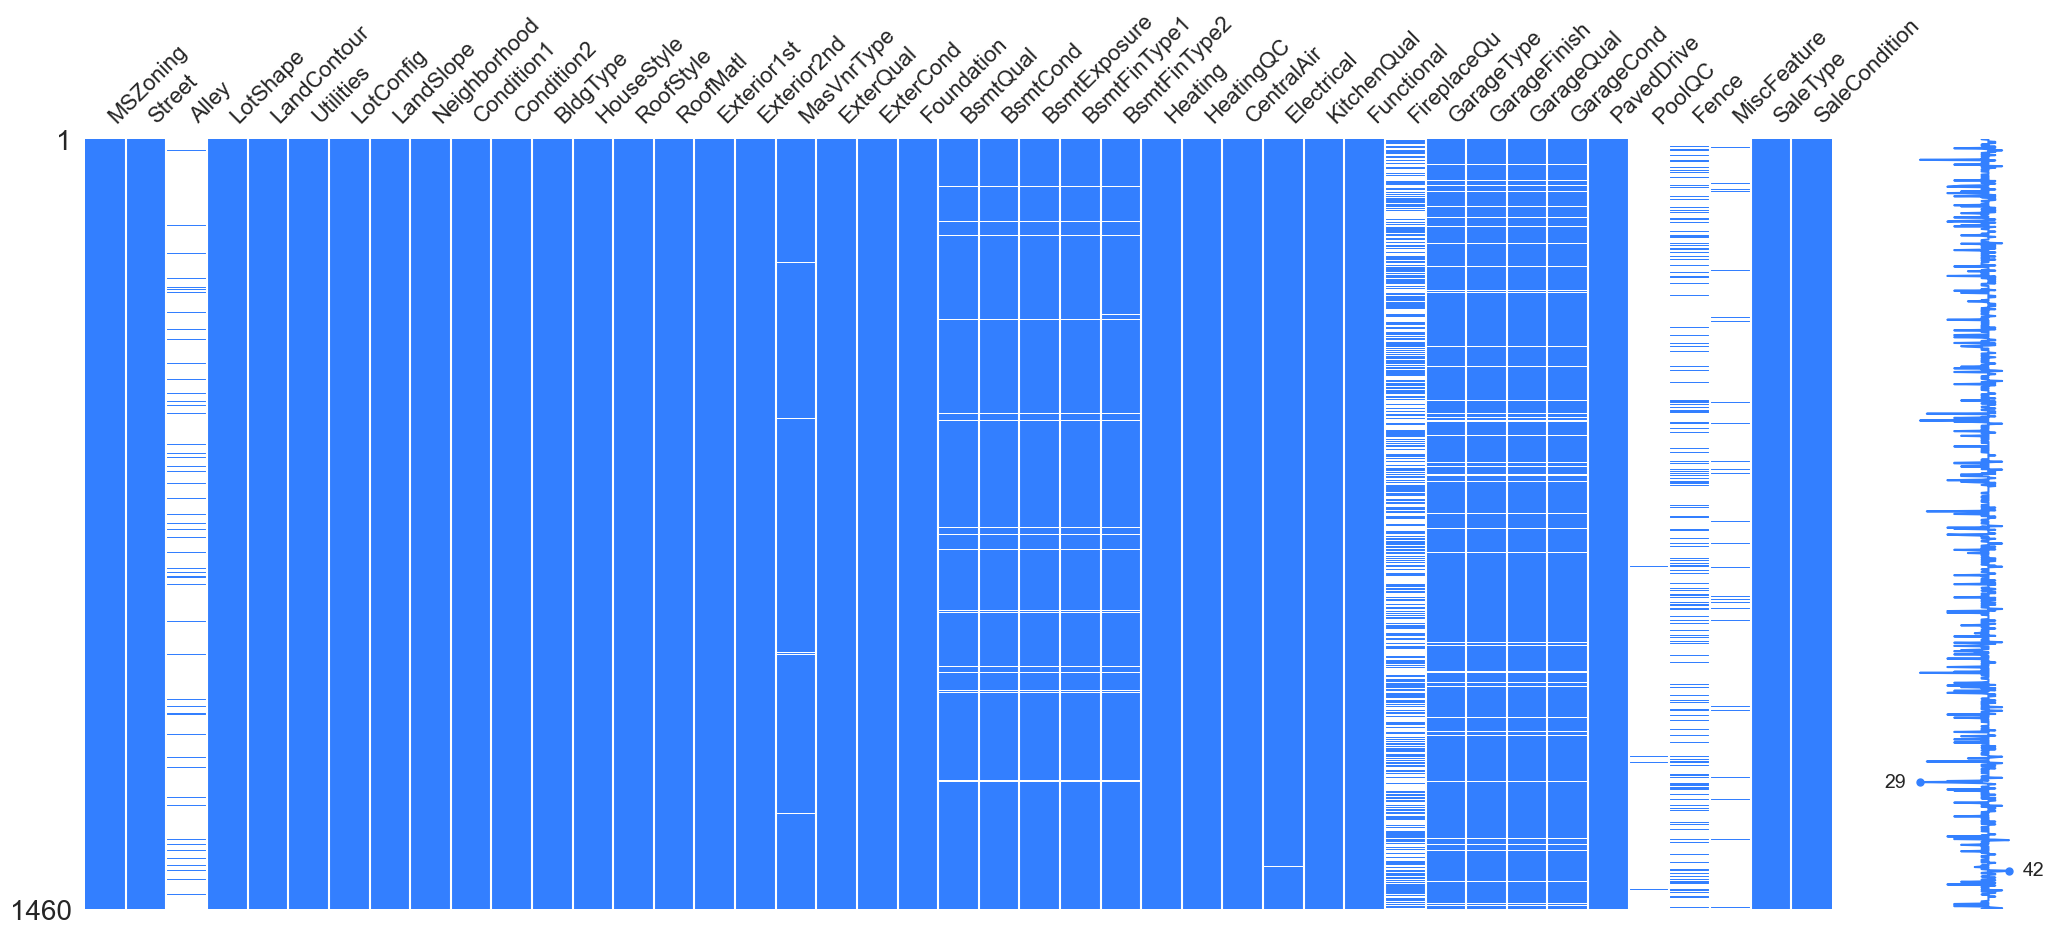

In [61]:
msno.matrix(house_cat_att, color = (0.2, 0.5, 1));

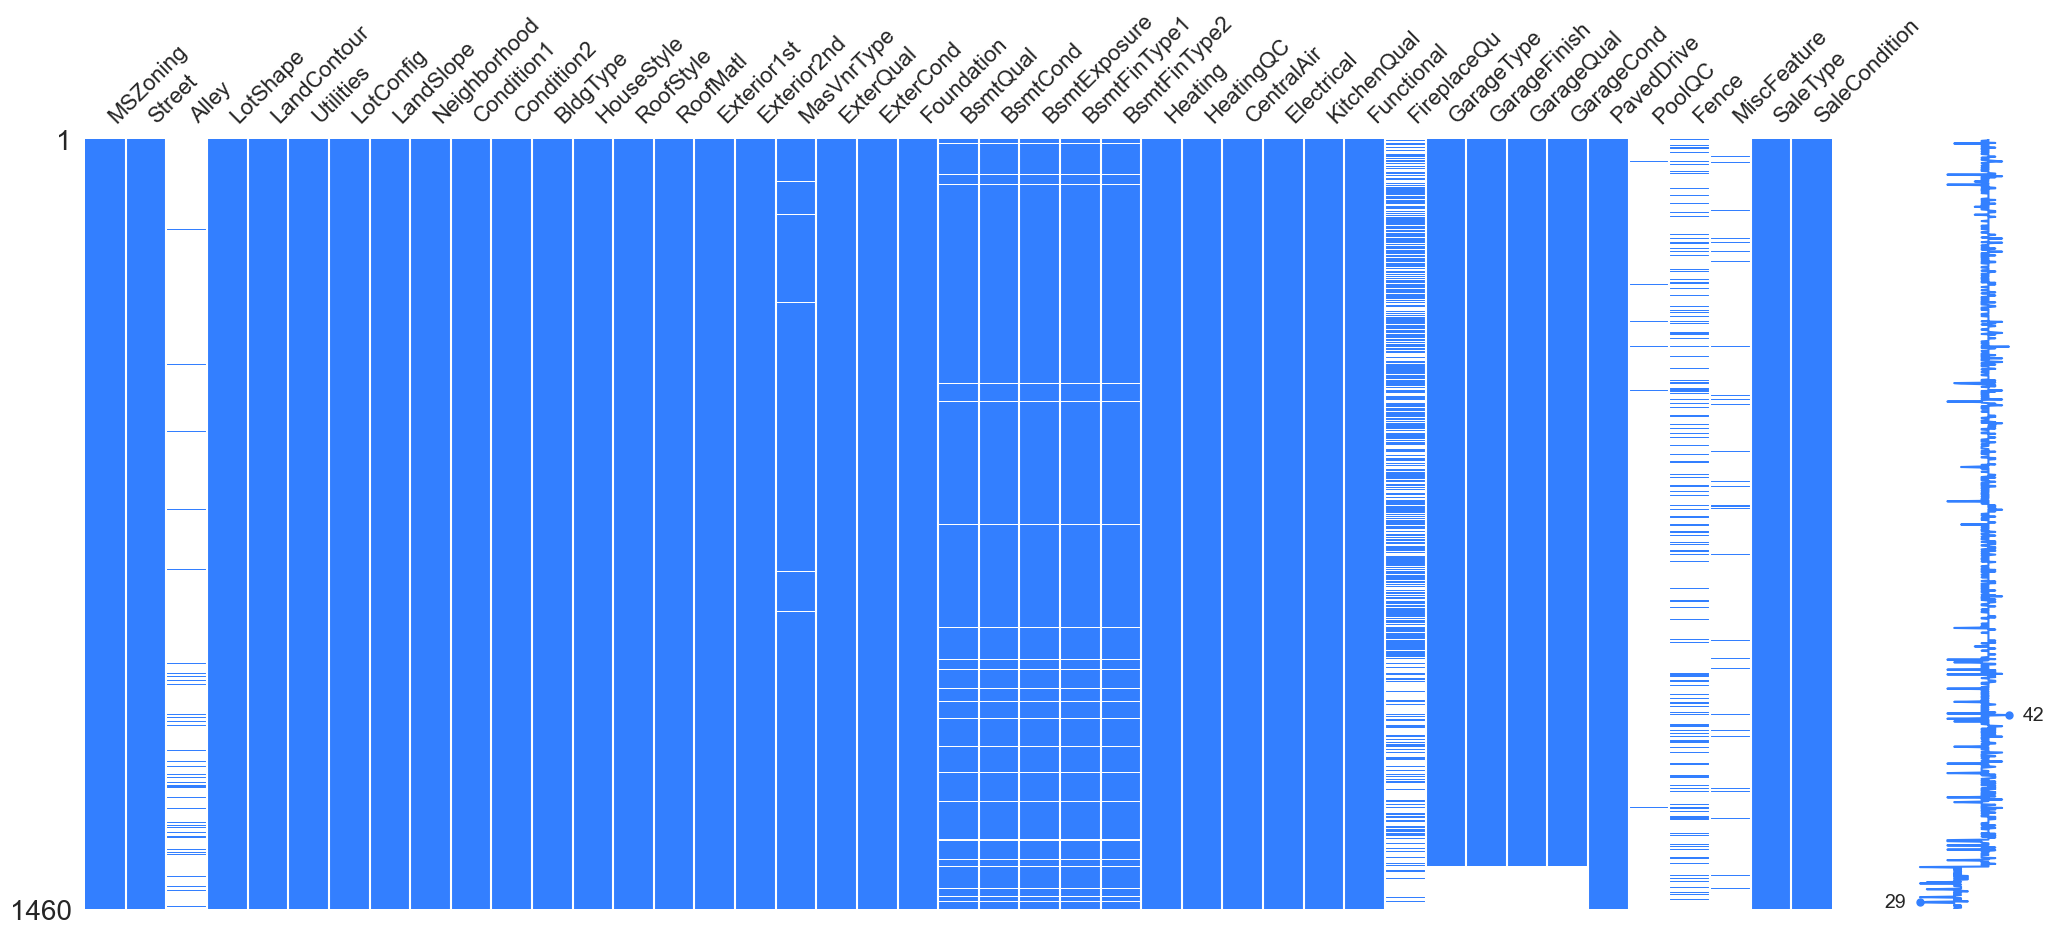

In [62]:
sorted = house_cat_att.sort_values("GarageType")
msno.matrix(sorted, color = (0.2, 0.5, 1));

In [63]:
sorted = house_cat_att.sort_values("BsmtQual")
msno.matrix(sorted, color = (0.2, 0.5, 1));

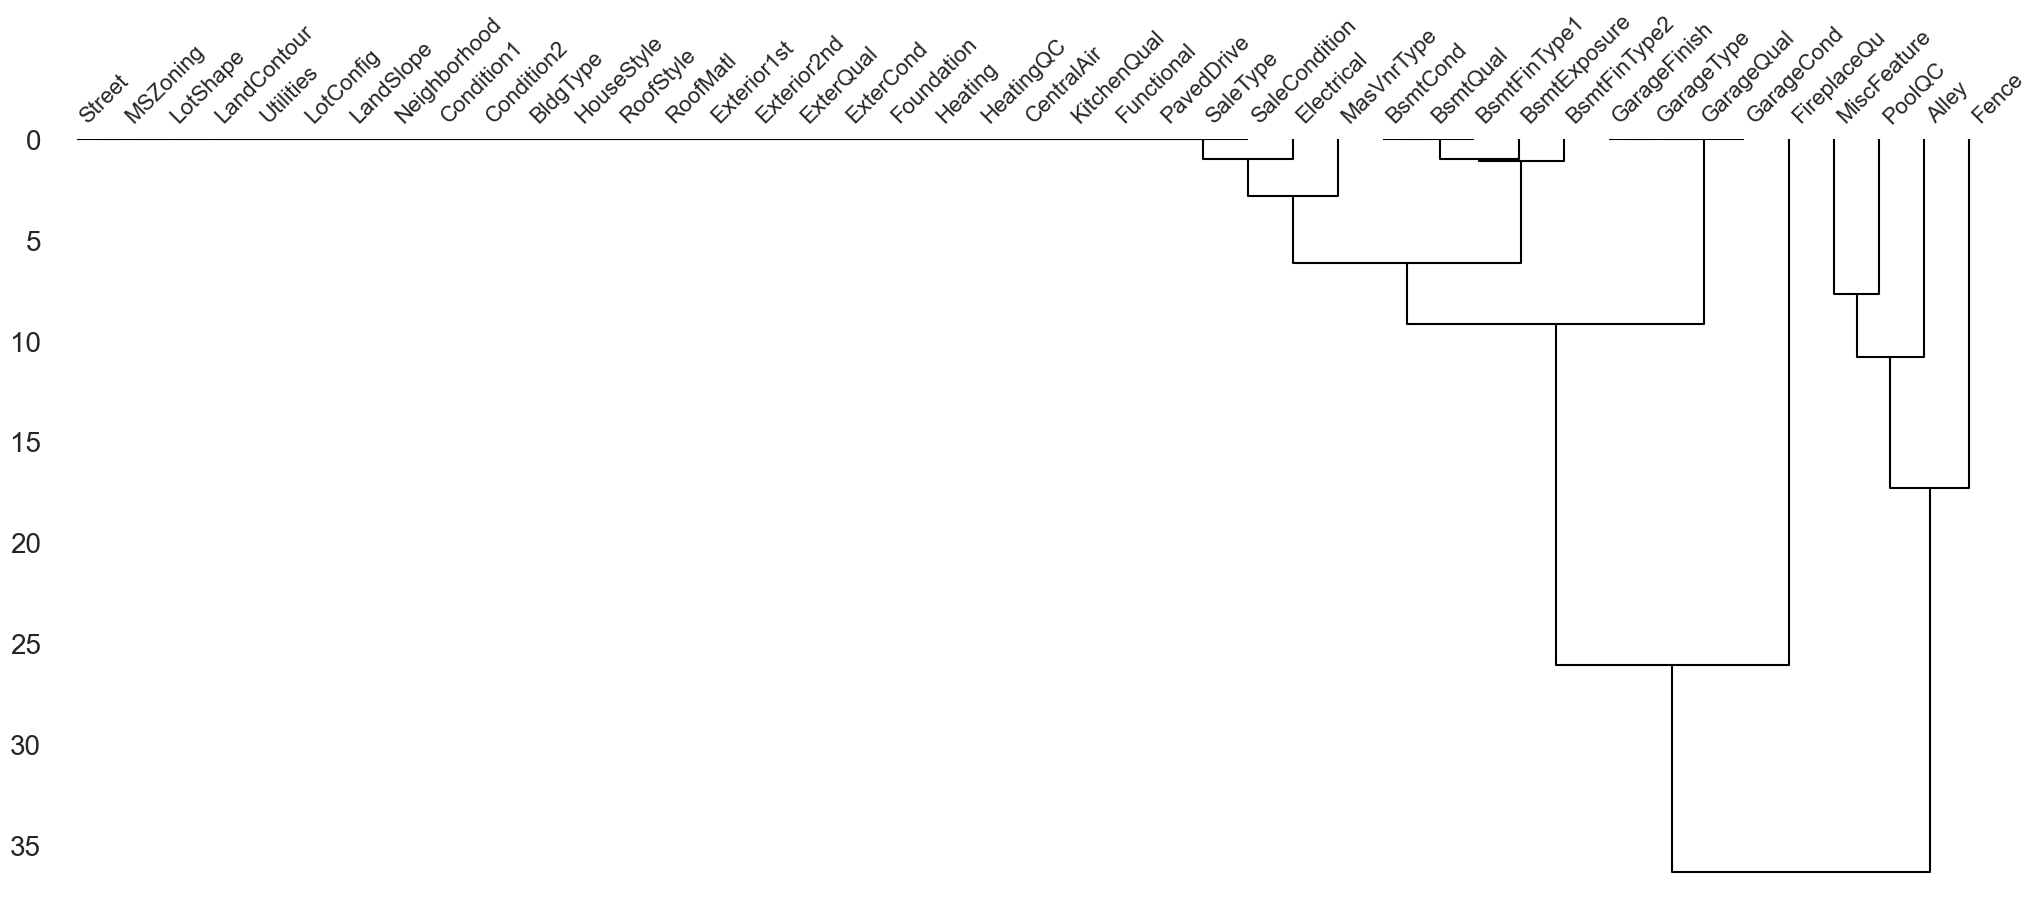

In [64]:
# The dendogram plot groups together columns that have strong correlations in nullity.
msno.dendrogram(house_cat_att);

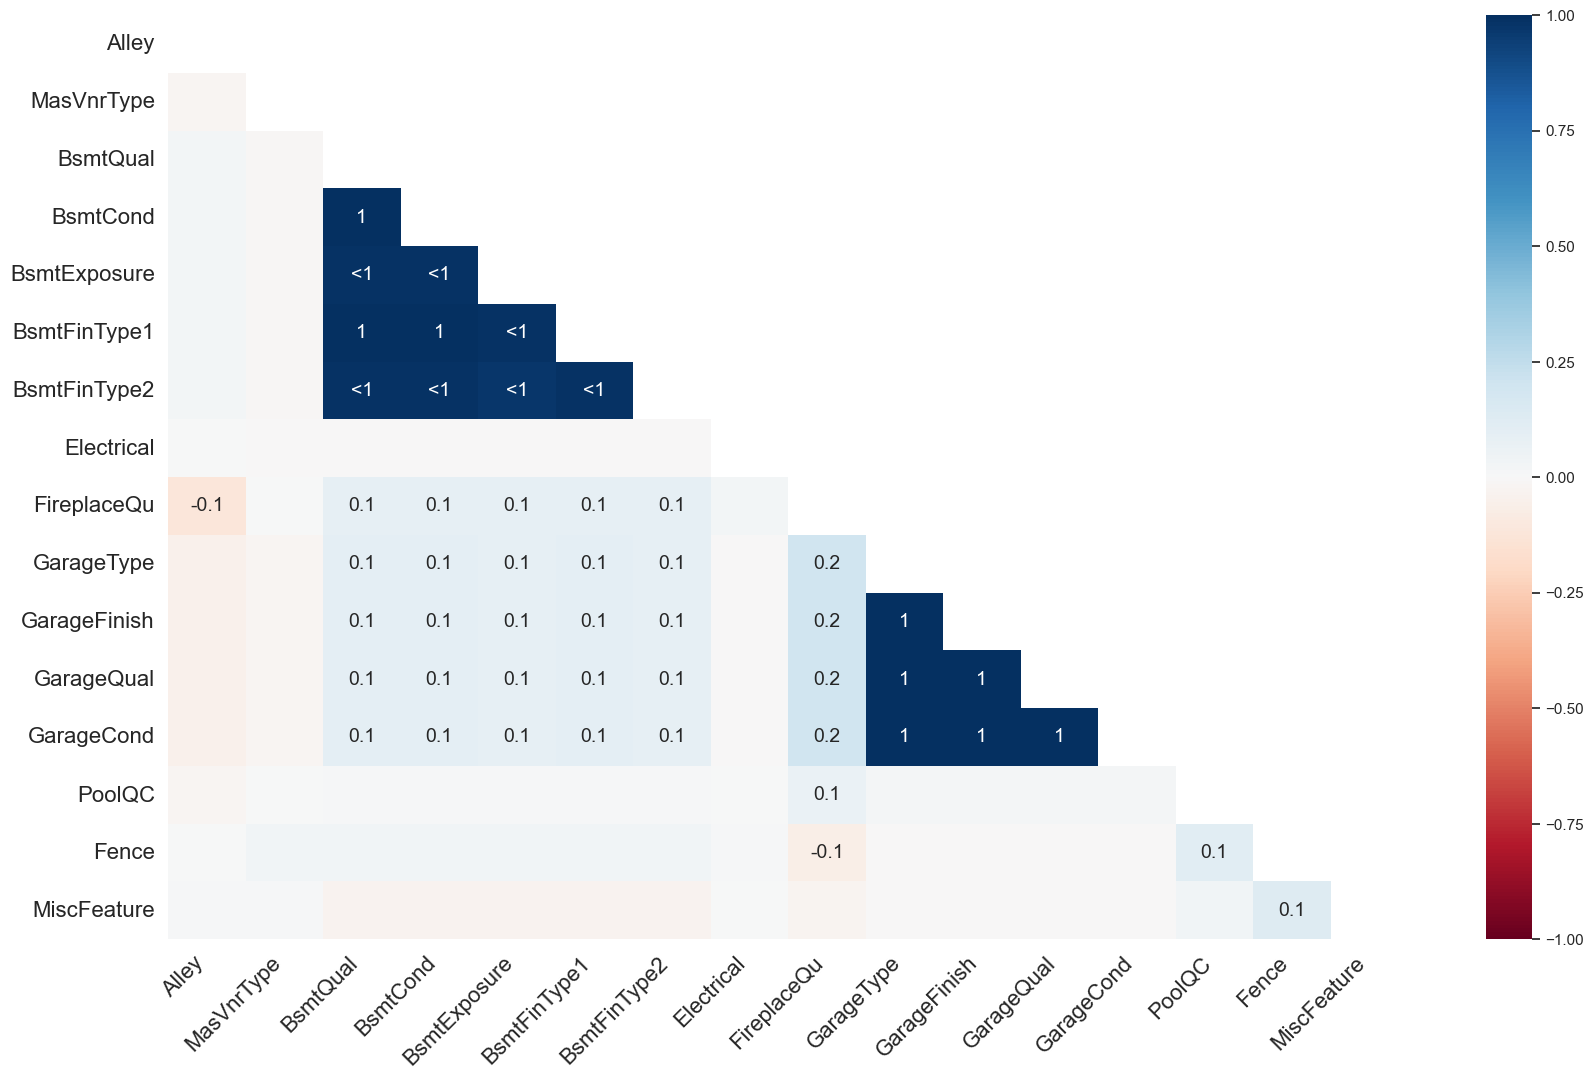

In [65]:
msno.heatmap(house_cat_att);

* Remove/ Drop columns : **'PoolQc'**, **'MiscFeature'**, **'Alley'**, **'Fence'**

* **Basement** columns: **'BsmtQual'**, **'BsmtCond'**, **'BsmtExposure'**, **'BsmtFinType1'**, **'BsmtFinType2'** have "same" mising values. One can stay, others we should remove.

* **Garage** columns: **'GarageType'**, **'GarageFinish'**, **'GarageQual'**, **'GarageCond'** have "same" missing values. One can stay, others we should remove.

# 5.) Feature Engineering<a id = "FeatureEng"></a>

In [66]:
# Merge the datasets so we can see process them together
df = pd.concat([X, house_test])

In [67]:
df.head(4)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   

   Condition2 BldgType  ... PavedDrive  WoodDeckSF  OpenPorchSF  \
Id                      ...                                       
1        Norm     1Fam  ...          Y           0           61   
2        Norm     1Fam  ...          Y         298            0   
3        Norm     1Fam  ...          Y           0           42   
4        Norm     1Fam  ...          Y           0           35   

    EnclosedPorch  3SsnPorch ScreenPorch PoolArea PoolQC Fence MiscFeature  \
Id                                                                           
1               0          0           0        0    NaN   NaN         NaN   
2               0          0           0        0    NaN   NaN         NaN   
3               0          0           0        0    NaN   NaN         NaN   
4             272          0           0        0    NaN   NaN         NaN   

    MiscVal MoSold YrSold SaleType SaleCondition  
Id                                                
1         0      2   2008       WD        Normal  
2         0      5   2007       WD        Normal  
3         0      9   2008       WD        Normal  
4         0      2   2006       WD       Abnorml  

[4 rows x 79 columns]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## 5.1)  Creating New Features <a id = "CreateNewFeature"></a>

In [69]:
df_1 = pd.DataFrame() # Dataframe to hold new features

# Age of House when was sold
df_1['Age'] = df['YrSold'] - df['YearBuilt']

# Years between Remodeling and sales
df_1['AgeRemodel'] = df['YrSold'] - df['YearRemodAdd']

Years = ['YrSold', 'YearBuilt', 'YearRemodAdd']
years_cols = ['YrSold', 'YearBuilt', 'AgeRemodel', 'Age']
df_1 = pd.concat([df, df_1], axis = 1).loc[:,years_cols]
X_1 = df_1.loc[X.index, :]
X_1.head()

YrSold  YearBuilt  AgeRemodel  Age
Id                                    
1     2008       2003           5    5
2     2007       1976          31   31
3     2008       2001           6    7
4     2006       1915          36   91
5     2008       2000           8    8

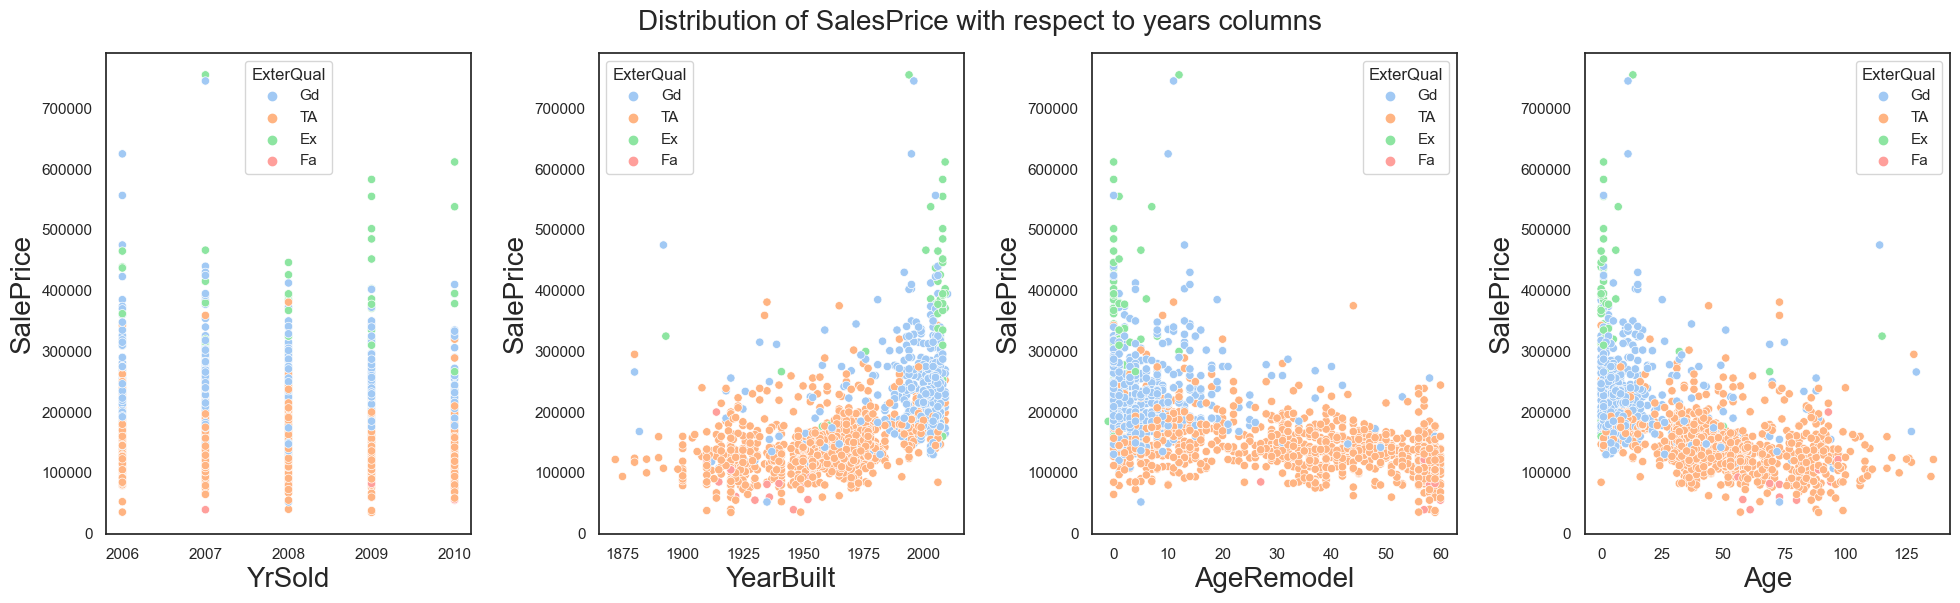

In [70]:
sns.set(style='whitegrid')

sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white")

fig, ax = plt.subplots(1, 4, figsize=(20, 6), dpi=100)

# scatterplot
for col,i in zip(years_cols, [0,1,2,3]):
    sns.scatterplot(x=X_1.loc[:,col], y=y, ax=ax[i], hue=X.ExterQual, palette='pastel')

fig.tight_layout()
fig.text(0.5, 1, 'Distribution of SalesPrice with respect to years columns', size=20, ha="center", va="center")
plt.show()

In [71]:
# Correlation of years columns with SalePrice
abs(X_1.corrwith(y))

YrSold        0.028923
YearBuilt     0.522897
AgeRemodel    0.509079
Age           0.523350
dtype: float64

## 5.2)  Creating New Boolean Features <a id ="CreateNewBoleanFeature"></a>

**Remodel column:**
* False (for houses which are having Remodel data same as as construction data - no modeling or additions)
* True (for houses with modeling or additions have done)

**Garage column:**
* False (for houses whish are having missing values in columns: GarageType, GarageFinish, GarageQual, GarageCond)

**Basement column:**
* False (for houses whish are having missing values in columns: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2)

**Masonry vaneer column:**
* False (for houses which are having missing values in columns MasVnrType, MasVnrArea)

In [72]:
df_2 = pd.DataFrame() # DataFrame to hold new features

df_2['Remodel'] = df['YearRemodAdd']!= df['YearBuilt']
df_2['Garage'] = df['GarageQual'].notnull()
df_2['Bsmt'] = df['BsmtQual'].notnull()
df_2['Masonry'] = df['MasVnrType'].notnull()

# Converting boolean columns [False, True] into numerical columns [0,1]
df_2 = df_2.replace([False, True], [0,1])
df_2.tail()

Remodel  Garage  Bsmt  Masonry
Id                                  
2915        0       0     1        1
2916        0       1     1        1
2917        1       1     1        1
2918        0       0     1        1
2919        1       1     1        1

###  Replacing ordered categories with numbers

In [73]:
object_cols = df.select_dtypes(include = ['object']).columns
# Categorical Columns with number of unique categories in them
df[object_cols].nunique().sort_values()

Street            2
Alley             2
CentralAir        2
Utilities         2
LandSlope         3
PoolQC            3
PavedDrive        3
GarageFinish      3
BsmtQual          4
ExterQual         4
MasVnrType        4
KitchenQual       4
BsmtCond          4
BsmtExposure      4
Fence             4
MiscFeature       4
LandContour       4
LotShape          4
FireplaceQu       5
Electrical        5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
BldgType          5
ExterCond         5
BsmtFinType1      6
RoofStyle         6
GarageType        6
Foundation        6
Heating           6
BsmtFinType2      6
SaleCondition     6
Functional        7
RoofMatl          8
HouseStyle        8
Condition2        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

In [74]:
ordinal_cols = [i for i in object_cols if ('QC' in i) or ('Qu' in i) or ('Fin' in i) or ('Cond' in i) and ('Condition' not in i)]
df.loc[:, ordinal_cols] = df.loc[:, ordinal_cols].fillna('NA')
print("Column Names: [Unique Categories in each column]")
{col: [*df[col].unique()] for col in ordinal_cols}

Column Names: [Unique Categories in each column]


{'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'],
 'ExterCond': ['TA', 'Gd', 'Fa', 'Po', 'Ex'],
 'BsmtQual': ['Gd', 'TA', 'Ex', 'NA', 'Fa'],
 'BsmtCond': ['TA', 'Gd', 'NA', 'Fa', 'Po'],
 'BsmtFinType1': ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'],
 'BsmtFinType2': ['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ'],
 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa', 'NA'],
 'FireplaceQu': ['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'],
 'GarageFinish': ['RFn', 'Unf', 'Fin', 'NA'],
 'GarageQual': ['TA', 'Fa', 'Gd', 'NA', 'Ex', 'Po'],
 'GarageCond': ['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex'],
 'PoolQC': ['NA', 'Ex', 'Fa', 'Gd']}

In [75]:
# 1) Columns with similar ordered categories (Poor < Fair< Typical/Average < Good < Excellent)
ordinal_cols_1 = [i for i in object_cols if ('QC' in i) or ('Qu' in i) or ('Cond' in i) and ('Condition' not in i)]
df.loc[:,ordinal_cols_1] = df.loc[:,ordinal_cols_1].replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5])


# 2) Columns with similar ordered categories [No Garage/Basement < Unfinished< Rough Finished < Finished, etc]
ordinal_cols_2 = ['BsmtFinType1', 'BsmtFinType2']
df.loc[:,ordinal_cols_2] = df.loc[:,ordinal_cols_2].replace(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],[0,1,2,3,4,5,6])


# 3) Column with ordered categories 
# (No Basement< No Exposure < Minimum Exposure< Average Exposure < Good Exposure)
ordinal_cols_3 = ['BsmtExposure']
df.loc[:,ordinal_cols_3] = df.loc[:, ordinal_cols_3].fillna ('NA')
df.loc[:,ordinal_cols_3] = df.loc[:, ordinal_cols_3].replace(['NA', 'No', 'Mn', 'Av', 'Gd'], [0,1,2,3,4])


# 4) Column with order categories (Regular< Slightly irregural< Moderately Irregular < Irregular)
ordinal_cols_4 = ['LotShape']
df.loc[:, ordinal_cols_4] = df.loc[:, ordinal_cols_4].replace(['Reg', 'IR1', 'IR2', 'IR3'], [0,1,2,3])


# 5] Column with ordered categories (No Garage<Unfinished<Rough Finished<Finished)
ordinal_cols_5 = ['GarageFinish']
df.loc[:,ordinal_cols_5] = df.loc[:,ordinal_cols_5].replace(['NA', 'Unf', 'RFn', 'Fin'], [0,1,2,3])


# 6] Home functionality Column
ordinal_cols_6 = ['Functional']
df.loc[:,ordinal_cols_6] = df.loc[:,ordinal_cols_6].fillna('Mod')
df.loc[:,ordinal_cols_6] = df.loc[:,ordinal_cols_6].replace(["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], list(range(8)))


In [76]:
o_columns = ordinal_cols_1+ordinal_cols_2+ordinal_cols_3+ordinal_cols_4+ordinal_cols_5+ordinal_cols_6
df.loc[:,o_columns].dtypes.value_counts()

int64    16
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   int64  
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [78]:
SF_cols = [i for i in df.columns if 'SF' in i]
SF_cols

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

In [79]:
df[SF_cols].isnull().sum()

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

## 5.3)  Creating features using mathematical transformations <a id = "CreaeNewFeatureMathTransf"></a>

In [80]:
Bath_cols = [i for i in df if 'Bath' in i]
Bath_cols

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

In [81]:
df[Bath_cols].isnull().sum()

BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
dtype: int64

In [82]:
X[Bath_cols].isnull().sum()

BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
dtype: int64

In [83]:
df[SF_cols + Bath_cols] = df[SF_cols + Bath_cols].fillna(0)

In [84]:
df_3 = pd.DataFrame() # DataFrame to hold new features

df_3['TotalSF'] = df[SF_cols].sum(axis = 1)
df_3['TotalBath'] = df.FullBath + df.BsmtFullBath + df.HalfBath/2 + df.BsmtHalfBath/2

# TotRmsAbvGrd- total number of rooms above grade (does not include bathrooms)
df_3['Spaciousness_Avg'] = (df['1stFlrSF'] + df['2ndFlrSF'])/df.TotRmsAbvGrd

# GrLivArea - above grade(ground) living area in square feet
# LotArea - Lot size in square feet
df_3['LivLotRation'] = df.GrLivArea/df.LotArea

In [85]:
Porches = [i for i in df if "Porch" in i]
Porches

['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

In [86]:
df[Porches].isnull().sum()

OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
dtype: int64

In [87]:
Porches.append('WoodDeckSF')
Porches

['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF']

In [88]:
# OpenPorchSF - Open porch area in square feet
# EnclosedPorch - Enclosed porch area in square feet
# 3SsnPorch - Three season porch area in square feet
# ScreenPorch - Screen porch area in square feet
# WoodDeckSF - Wood deck area in square feet
df[Porches]

OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  WoodDeckSF
Id                                                                  
1              61              0          0            0           0
2               0              0          0            0         298
3              42              0          0            0           0
4              35            272          0            0           0
5              84              0          0            0         192
...           ...            ...        ...          ...         ...
2915            0              0          0            0           0
2916           24              0          0            0           0
2917            0              0          0            0         474
2918           32              0          0            0          80
2919           48              0          0            0         190

[2919 rows x 5 columns]

In [89]:
df_4  = pd.DataFrame() # DataFrame holdes the numbers of porches
    
df_4['PorchNumber'] = df[Porches].gt(0.0).sum(axis = 1)
df_4

PorchNumber
Id               
1               1
2               1
3               1
4               2
5               2
...           ...
2915            0
2916            1
2917            1
2918            2
2919            2

[2919 rows x 1 columns]

## 5.4) Handling rare categorical values<a id = "HandlRareCatVal"></a>

In [90]:
cat_columns = list(df.select_dtypes('object').columns)
before = df[cat_columns].nunique().sum()
before

178

In [91]:
cat_columns

['MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [92]:
# For categorical columns, some unique categories are occuring very rarely.
# Let see an example of 'HouseStyle' column.

df.HouseStyle.value_counts(normalize = True)

1Story    0.503940
2Story    0.298732
1.5Fin    0.107571
SLvl      0.043851
SFoyer    0.028434
2.5Unf    0.008222
1.5Unf    0.006509
2.5Fin    0.002741
Name: HouseStyle, dtype: float64

In [93]:
for col in cat_columns:
    df[col] = df[col].mask(df[col].map(df[col].value_counts(normalize=True)) < 0.01, 'Other')

In [94]:
after = df[cat_columns].nunique().sum()
print(f"Number of uniqie categories reduced from {before} to {after}.")

Number of uniqie categories reduced from 178 to 132.


In [95]:
# MSSubClass feature is read as an 'int' type, but it is actually a (nominative) categorical.

features_nom = ['MSSubClass'] + cat_columns

# Cast each of the above 21 columns into 'category' DataType
for name in features_nom:
    df[name] = df[name].astype('category')
    
    # Add a None category for missing values
    if 'NA' not in df[name].cat.categories:
        df[name] = df[name].cat.add_categories('NA')

In [96]:
# Label encoding for categoricals

for colname in df.select_dtypes(["category"]):
    df[colname] = df[colname].cat.codes

In [97]:
# object type is converted into int8
df.dtypes.value_counts()

int64      40
int8       28
float64    11
dtype: int64

### Concat Created Features with Original Features 

In [98]:
df.drop(Years + Porches, axis = 1, inplace = True)
df = pd.concat([df, df_1, df_2, df_3, df_4], axis = 1)
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
Id                                                                        
1            5         2         65.0     8450       1     -1         0   
2            0         2         80.0     9600       1     -1         0   
3            5         2         68.0    11250       1     -1         1   
4            6         2         60.0     9550       1     -1         1   
5            5         2         84.0    14260       1     -1         1   

    LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
Id                                                                           
1             3          0          3          0             3           2   
2             3          0          2          0            15           1   
3             3          0          3          0             3           2   
4             3          0          0          0             4           2   
5             3          0          2          0            12           2   

    Condition2  BldgType  ...  SaleType  SaleCondition  YrSold  YearBuilt  \
Id                        ...                                               
1            0         0  ...         3              2    2008       2003   
2            0         0  ...         3              2    2007       1976   
3            0         0  ...         3              2    2008       2001   
4            0         0  ...         3              0    2006       1915   
5            0         0  ...         3              2    2008       2000   

    AgeRemodel  Age  Remodel  Garage  Bsmt  Masonry  TotalSF  TotalBath  \
Id                                                                        
1            5    5        0       1     1        1   3483.0        3.5   
2           31   31        0       1     1        1   4084.0        2.5   
3            6    7        1       1     1        1   3668.0        3.5   
4           36   91        1       1     1        1   3264.0        2.0   
5            8    8        0       1     1        1   4764.0        3.5   

    Spaciousness_Avg  LivLotRation  PorchNumber  
Id                                               
1         213.750000      0.202367            1  
2         210.333333      0.131458            1  
3         297.666667      0.158756            1  
4         245.285714      0.179791            2  
5         244.222222      0.154137            2  

[5 rows x 84 columns]

In [99]:
# Reform splits
X = df.loc[X.index, :]
X_test = df.loc[house_test.index,:]

In [100]:
print(X.shape, X_test.shape, sep = '\n')

(1460, 84)
(1459, 84)


In [101]:
X.isnull().sum()

MSSubClass            0
MSZoning              0
LotFrontage         259
LotArea               0
Street                0
Alley                 0
LotShape              0
LandContour           0
Utilities             0
LotConfig             0
LandSlope             0
Neighborhood          0
Condition1            0
Condition2            0
BldgType              0
HouseStyle            0
OverallQual           0
OverallCond           0
RoofStyle             0
RoofMatl              0
Exterior1st           0
Exterior2nd           0
MasVnrType            0
MasVnrArea            8
ExterQual             0
ExterCond             0
Foundation            0
BsmtQual              0
BsmtCond              0
BsmtExposure          0
BsmtFinType1          0
BsmtFinSF1            0
BsmtFinType2          0
BsmtFinSF2            0
BsmtUnfSF             0
TotalBsmtSF           0
Heating               0
HeatingQC             0
CentralAir            0
Electrical            0
1stFlrSF              0
2ndFlrSF        

## 5.5) Imputing Numerical Columns<a  id = "ImputingNumericalColumns"></a>

In [102]:
# LotFrontage

X['LotFrontage'] = X.groupby("Neighborhood")["LotFrontage"].transform(
        lambda x: x.fillna(x.median()))

X_test['LotFrontage'] = X_test.groupby("Neighborhood")["LotFrontage"].transform(
        lambda x: x.fillna(x.median()))

In [103]:
# MasVnrArea

X['MasVnrArea'] = X['MasVnrArea'].fillna(int(0))
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(int(0))

In [104]:
# GarageYrBlt

X['GarageYrBlt'] = X['GarageYrBlt'].fillna(X['GarageYrBlt'].median())
X_test['GarageYrBlt'] = X_test['GarageYrBlt'].fillna(X['GarageYrBlt'].median())

In [105]:
X.isnull().sum().sum()

0

### Remove columns that we mark.

In [106]:
X.drop(null_cols, axis = 1, inplace= True)
X_test.drop(null_cols, axis = 1, inplace = True)
X.drop('Utilities', axis = 1, inplace = True)
X_test.drop('Utilities', axis = 1, inplace = True)

In [107]:
X.shape

(1460, 79)

# 6.) Feature Selection <a  id = "FeatureSelection"></a>

## 6.1) Correlation between X and y <a id="CorrelationXy"></a>

In [108]:
# Mutual Information
def make_mi_scores(X, y):
    X = X.copy()
  
    # All discrete features should now have integer dtypes
  
    mi_scores = mutual_info_regression(X.select_dtypes('number'), y,  random_state=0)
    mi_scores = pd.DataFrame(mi_scores.round(3), columns=['MI_Scores'], index=X.select_dtypes('number').columns)
   
    return mi_scores

In [109]:
mi_scores = make_mi_scores(X,y)

mi_scores = pd.DataFrame(mi_scores, columns = ['MI_Scores'], index = X.select_dtypes('number').columns)

linear_corr = pd.DataFrame(X.corrwith(y).round(decimals = 2), columns = ['Lin_Correlation'])

corr_with_price = pd.concat([mi_scores, linear_corr], axis = 1)
corr_with_price = corr_with_price.sort_values('MI_Scores', ascending = False)

corr_with_price

MI_Scores  Lin_Correlation
TotalSF               0.600             0.76
OverallQual           0.562             0.79
Neighborhood          0.487             0.20
GrLivArea             0.484             0.71
TotalBsmtSF           0.367             0.61
GarageCars            0.365             0.64
YearBuilt             0.365             0.52
GarageArea            0.363             0.62
TotalBath             0.343             0.63
Age                   0.335            -0.52
KitchenQual           0.333             0.66
BsmtQual              0.332             0.59
ExterQual             0.331             0.68
1stFlrSF              0.309             0.61
GarageYrBlt           0.293             0.47
MSSubClass            0.282            -0.06
FullBath              0.281             0.56
GarageFinish          0.262             0.55
Spaciousness_Avg      0.249             0.55
AgeRemodel            0.248            -0.51
LotFrontage           0.225             0.35
TotRmsAbvGrd          0.222             0.53
2ndFlrSF              0.217             0.32
GarageType            0.205            -0.23
FireplaceQu           0.203             0.52
Foundation            0.200             0.44
Exterior2nd           0.170             0.09
Fireplaces            0.169             0.47
HeatingQC             0.166             0.43
LotArea               0.159             0.26
BsmtFinSF1            0.155             0.39
BsmtFinType1          0.146             0.30
Exterior1st           0.133             0.10
OverallCond           0.128            -0.08
BsmtUnfSF             0.118             0.21
MSZoning              0.116            -0.21
PorchNumber           0.110             0.41
MasVnrType            0.107             0.10
LotShape              0.094             0.27
HalfBath              0.092             0.28
SaleType              0.092            -0.21
MasVnrArea            0.091             0.47
LivLotRation          0.087            -0.00
GarageQual            0.082             0.27
HouseStyle            0.079             0.06
BsmtExposure          0.078             0.37
GarageCond            0.074             0.26
SaleCondition         0.069             0.32
BedroomAbvGr          0.068             0.17
Garage                0.063             0.24
CentralAir            0.058             0.25
PavedDrive            0.053             0.23
BldgType              0.051            -0.09
Electrical            0.041             0.23
BsmtCond              0.034             0.21
BsmtFinType2          0.033            -0.01
Bsmt                  0.032             0.15
KitchenAbvGr          0.029            -0.14
LandContour           0.028             0.02
BsmtFullBath          0.026             0.23
Condition1            0.024             0.12
Remodel               0.020            -0.02
ExterCond             0.020             0.02
MiscVal               0.016            -0.02
RoofStyle             0.014             0.19
Street                0.010             0.04
LandSlope             0.008             0.05
Condition2            0.008            -0.03
BsmtFinSF2            0.007            -0.01
BsmtHalfBath          0.005            -0.02
Masonry               0.003            -0.05
Heating               0.003            -0.09
YrSold                0.003            -0.03
LotConfig             0.002            -0.06
MoSold                0.000             0.05
RoofMatl              0.000             0.10
PoolArea              0.000             0.09
Functional            0.000             0.11
LowQualFinSF          0.000            -0.03

In [110]:
before = X.shape[1]
X.dtypes.value_counts()

int64      40
int8       24
float64    15
dtype: int64

In [111]:
# Numerical columns with large correlation with SalePrice
threshold = 0.01
numerical_cols = [cname for cname in X.select_dtypes('number').columns
                 if corr_with_price.MI_Scores[cname] > threshold]

# Keep selected columns only
selected_cols = numerical_cols
X = X[selected_cols]
X_test = X_test[selected_cols]
after = X.shape[1]


# Selected Features for Model Training or Fitting
print(f"Out of {before} features, {after} features are having MI_Scores more than {threshold}.")

Out of 79 features, 65 features are having MI_Scores more than 0.01.


In [112]:
# To see which columns were selected according to min correlation condition
info = pd.DataFrame(X.dtypes, columns=['Dtype'])
info['Unique'] = X.nunique().values
info['Null'] = X.isnull().sum().values
info.sort_values(['Dtype', 'Unique'])

Dtype  Unique  Null
CentralAir           int8       2     0
RoofStyle            int8       3     0
PavedDrive           int8       3     0
MSZoning             int8       4     0
LandContour          int8       4     0
SaleType             int8       4     0
BldgType             int8       5     0
MasVnrType           int8       5     0
Foundation           int8       5     0
Electrical           int8       5     0
SaleCondition        int8       5     0
Condition1           int8       6     0
HouseStyle           int8       6     0
GarageType           int8       6     0
Exterior1st          int8      11     0
Exterior2nd          int8      11     0
MSSubClass           int8      15     0
Neighborhood         int8      22     0
Remodel             int64       2     0
Garage              int64       2     0
Bsmt                int64       2     0
HalfBath            int64       3     0
LotShape            int64       4     0
ExterQual           int64       4     0
FullBath            int64       4     0
KitchenAbvGr        int64       4     0
KitchenQual         int64       4     0
Fireplaces          int64       4     0
GarageFinish        int64       4     0
PorchNumber         int64       4     0
ExterCond           int64       5     0
BsmtQual            int64       5     0
BsmtCond            int64       5     0
BsmtExposure        int64       5     0
HeatingQC           int64       5     0
FireplaceQu         int64       6     0
GarageQual          int64       6     0
GarageCond          int64       6     0
BsmtFinType1        int64       7     0
BsmtFinType2        int64       7     0
BedroomAbvGr        int64       8     0
OverallCond         int64       9     0
OverallQual         int64      10     0
TotRmsAbvGrd        int64      12     0
MiscVal             int64      21     0
AgeRemodel          int64      62     0
YearBuilt           int64     112     0
Age                 int64     122     0
2ndFlrSF            int64     417     0
1stFlrSF            int64     753     0
GrLivArea           int64     861     0
LotArea             int64    1073     0
BsmtFullBath      float64       4     0
GarageCars        float64       5     0
TotalBath         float64      10     0
GarageYrBlt       float64      97     0
LotFrontage       float64     115     0
MasVnrArea        float64     327     0
GarageArea        float64     441     0
BsmtFinSF1        float64     637     0
TotalBsmtSF       float64     721     0
BsmtUnfSF         float64     780     0
Spaciousness_Avg  float64     990     0
TotalSF           float64    1156     0
LivLotRation      float64    1423     0

In [113]:
def plot_mi_scores(scores):
    scores = scores.sort_values()
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

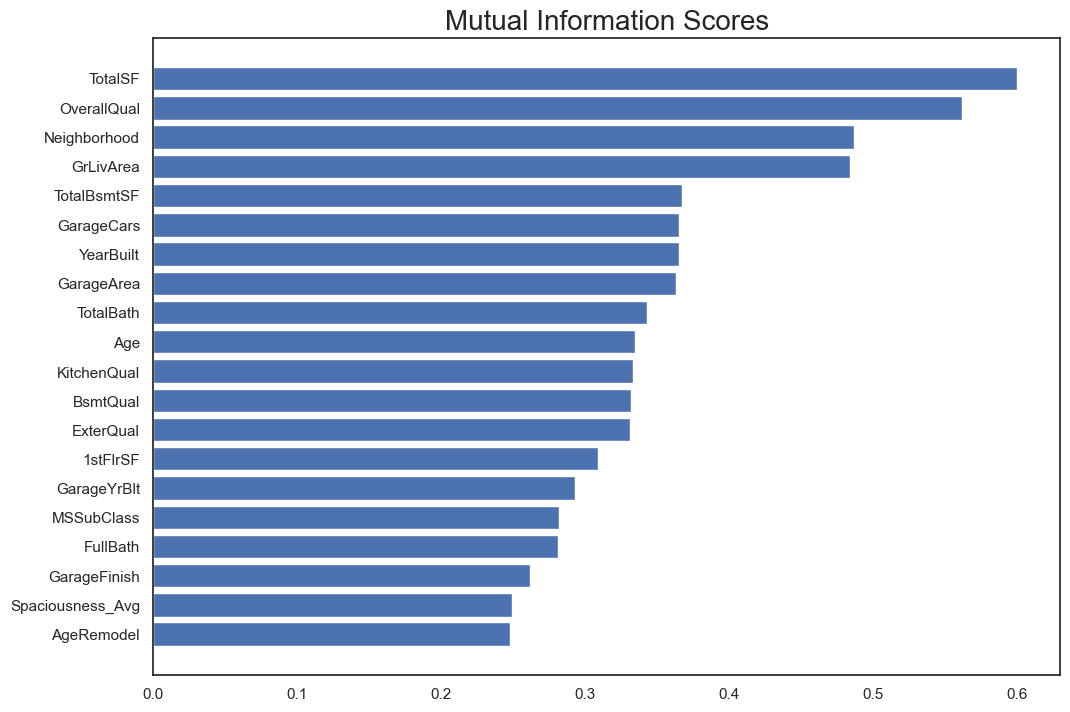

In [114]:
corr_with_price_ser = corr_with_price.iloc[:,0]
plot_mi_scores(corr_with_price_ser[0:20])

## Distribution of top 5 features correlated with 'SalePrice'

In [115]:
top_features = corr_with_price.index[1:6]

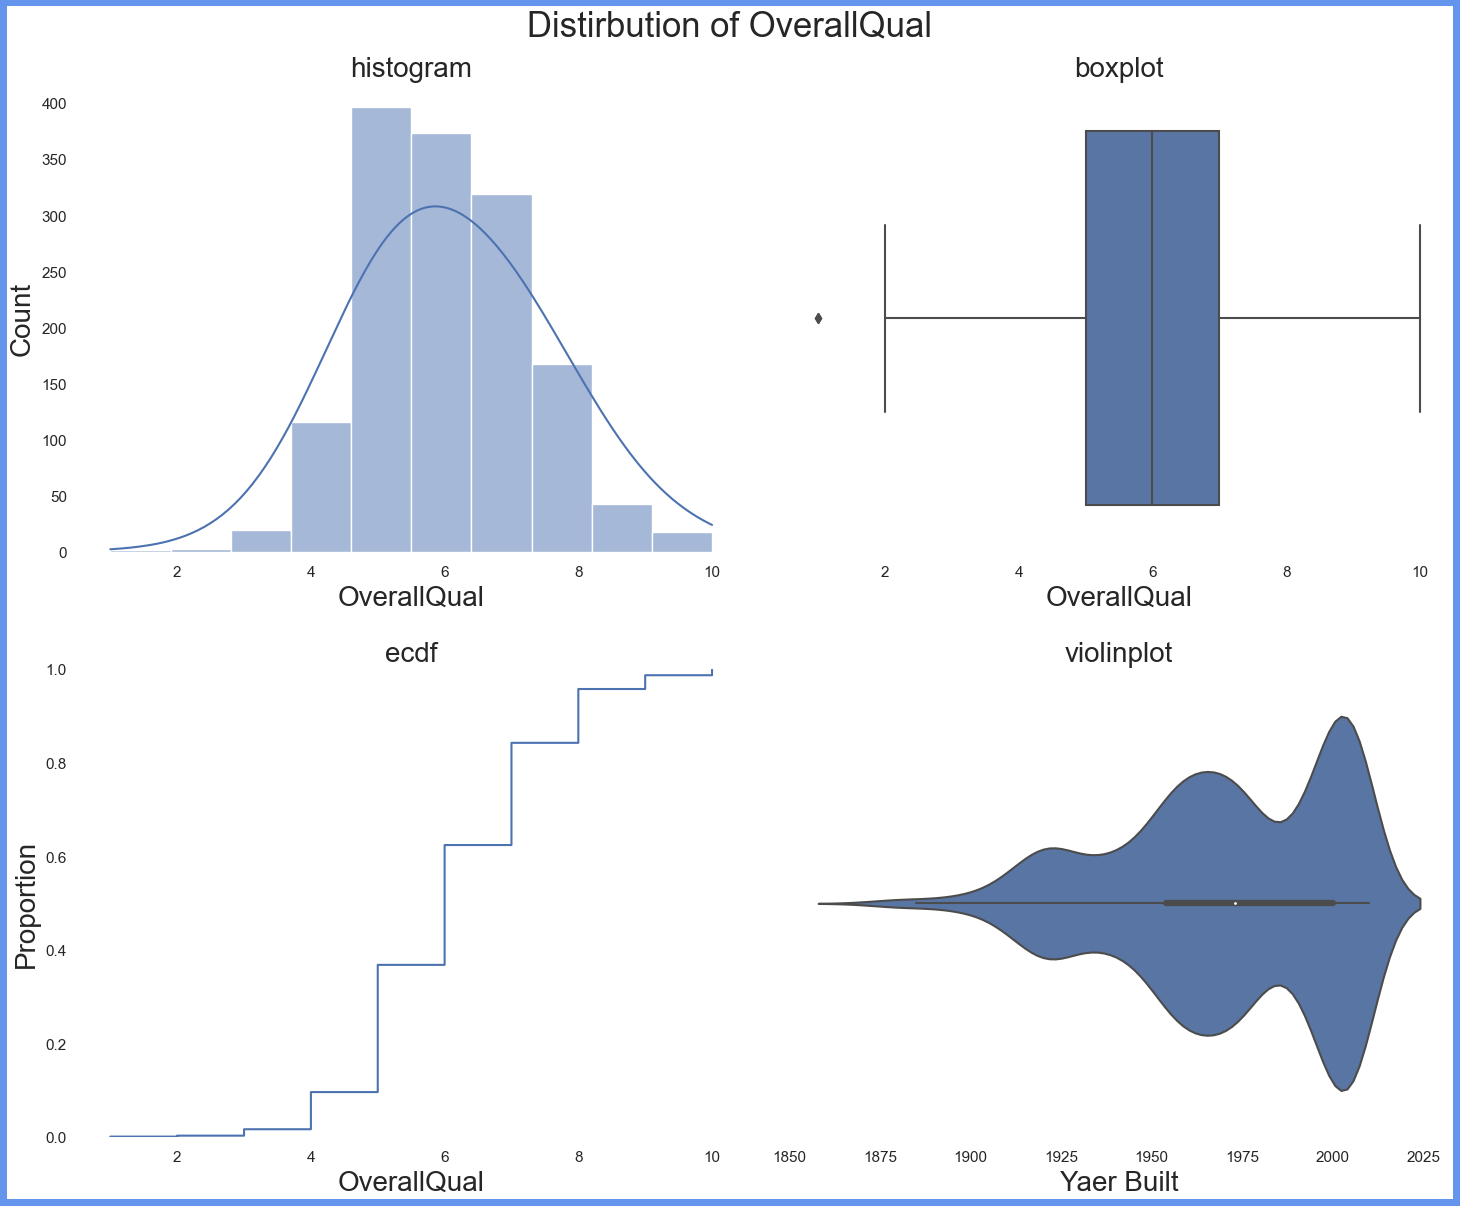

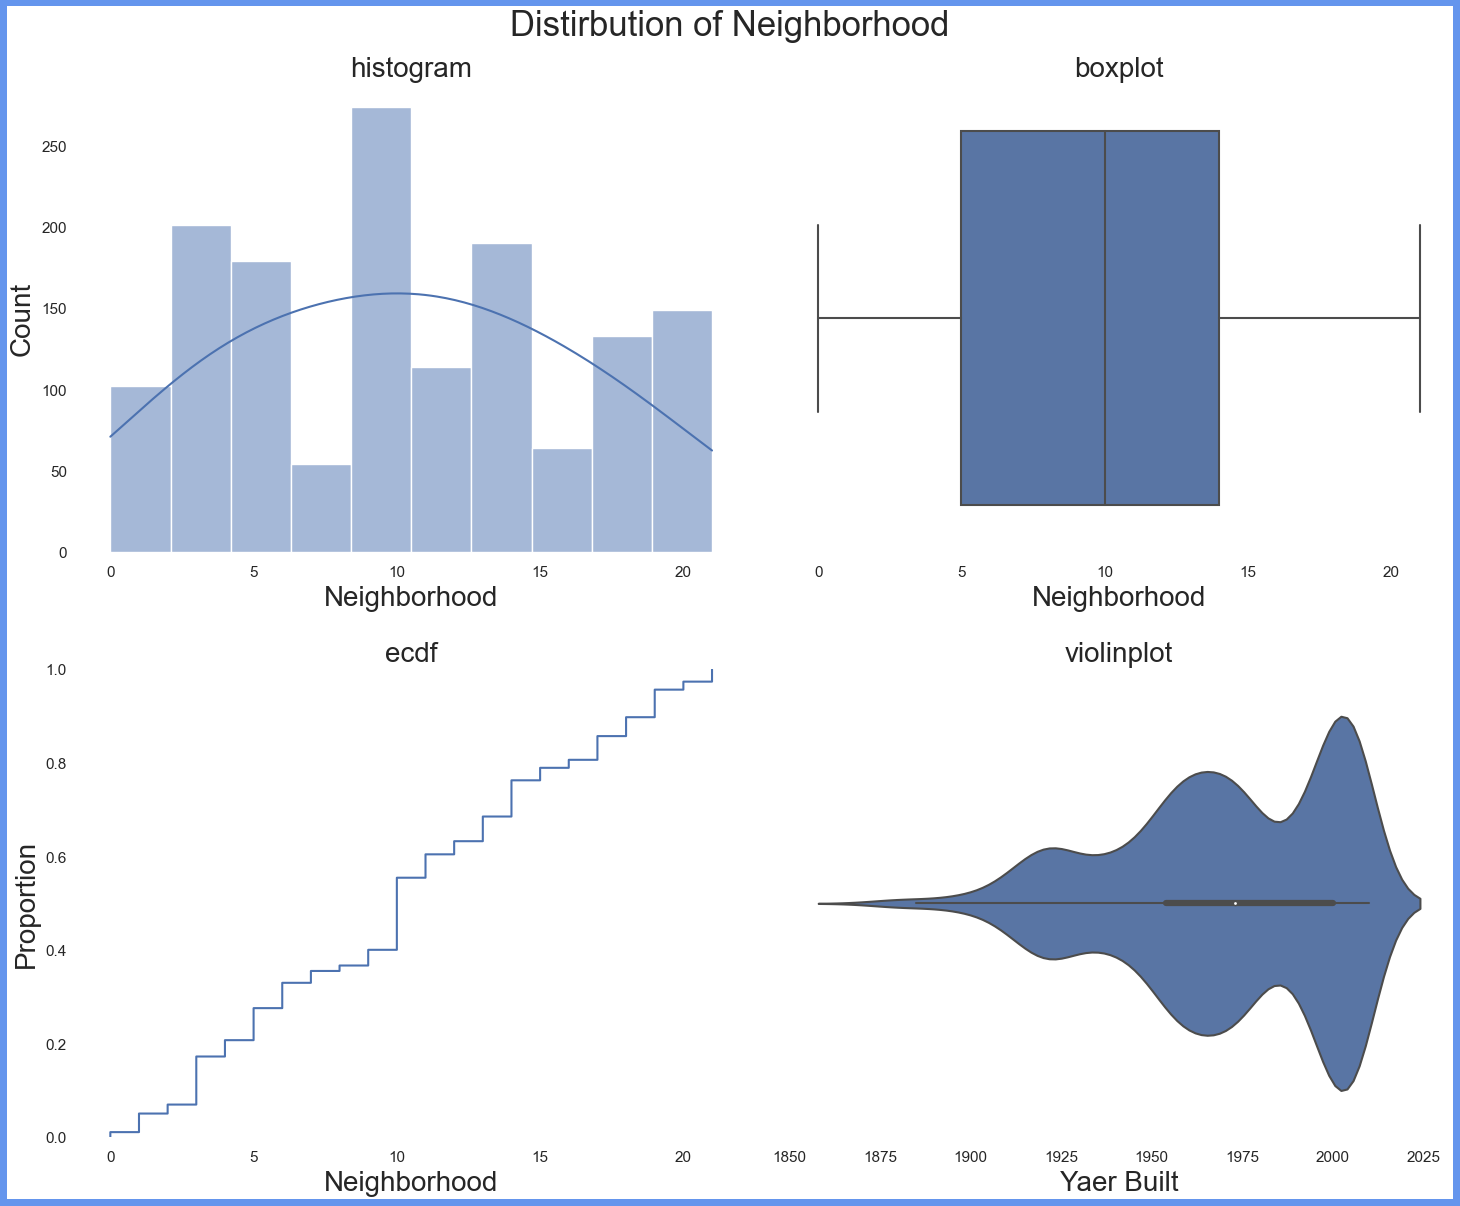

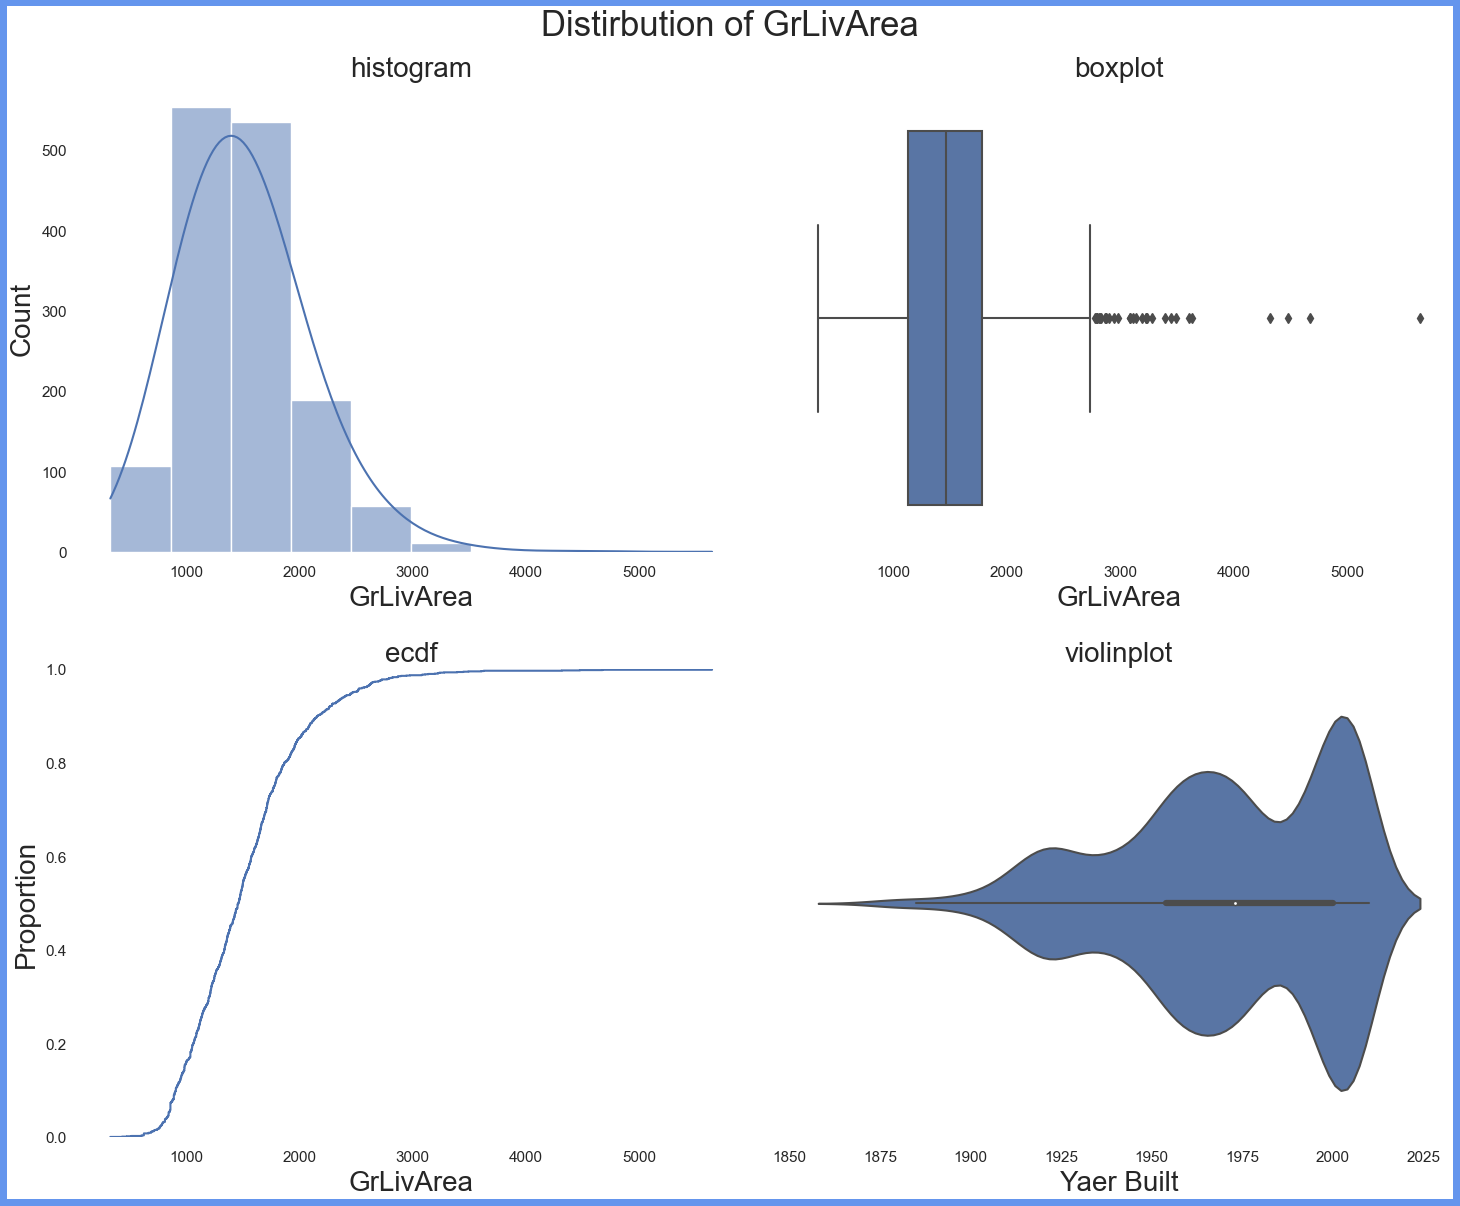

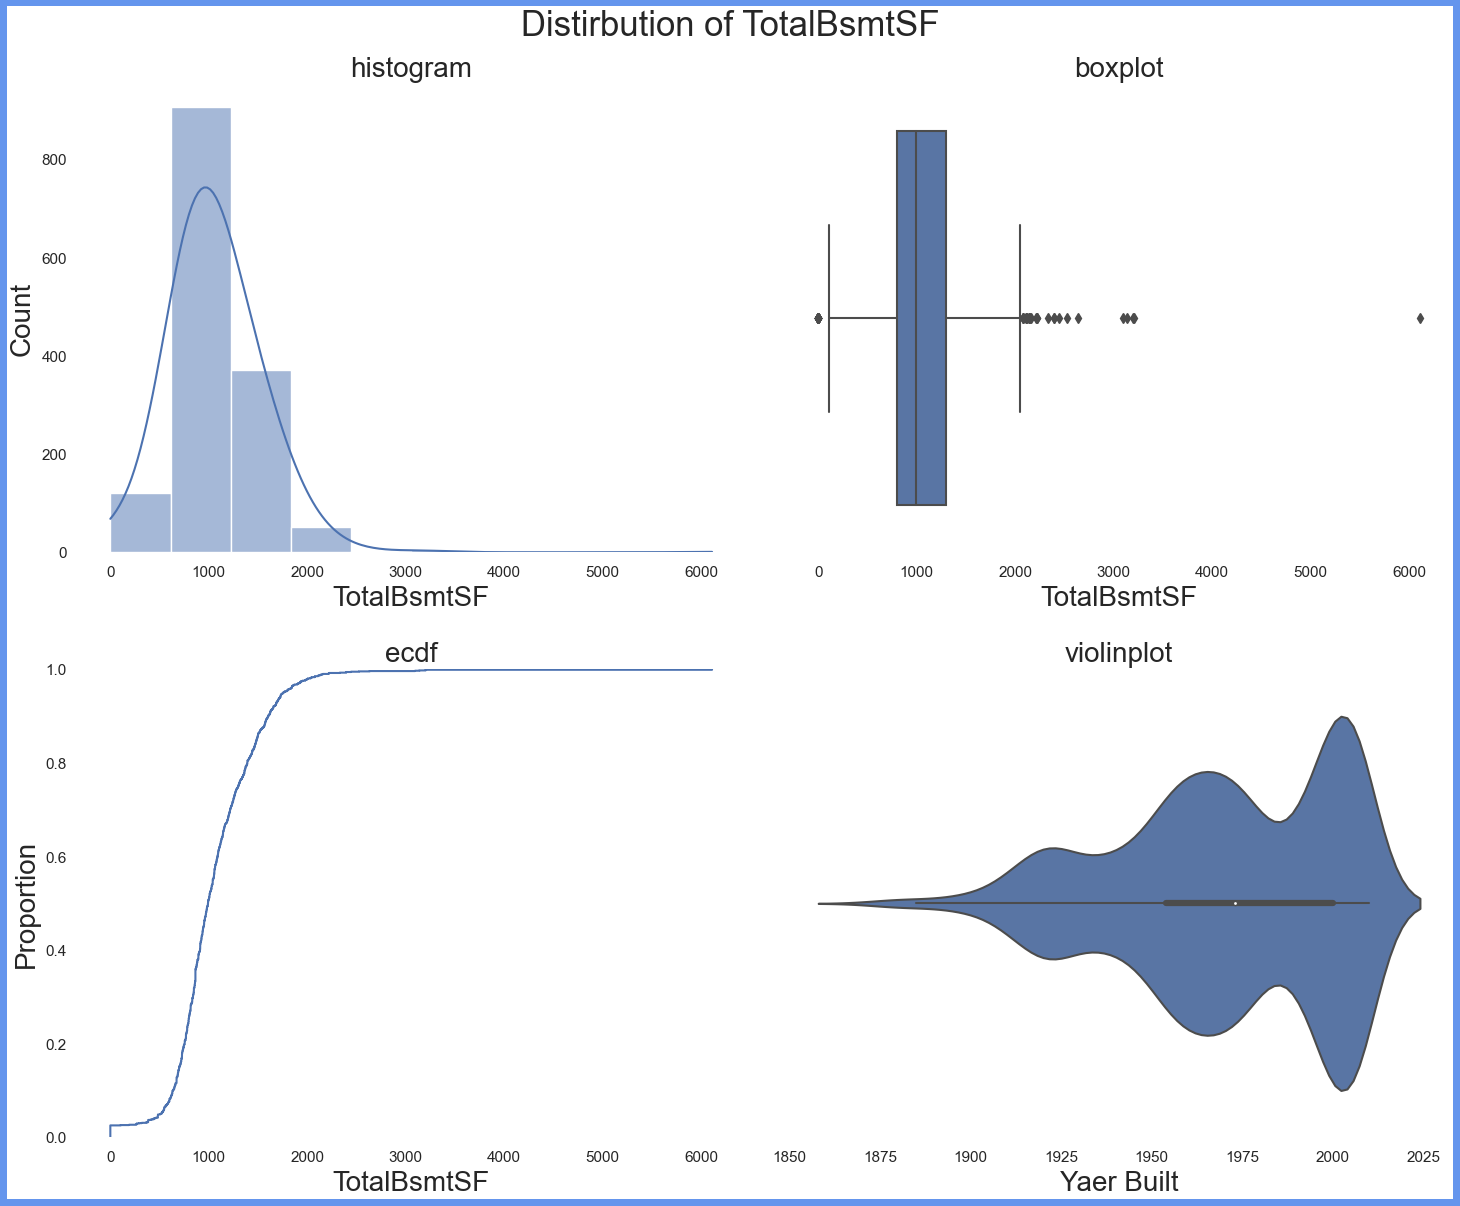

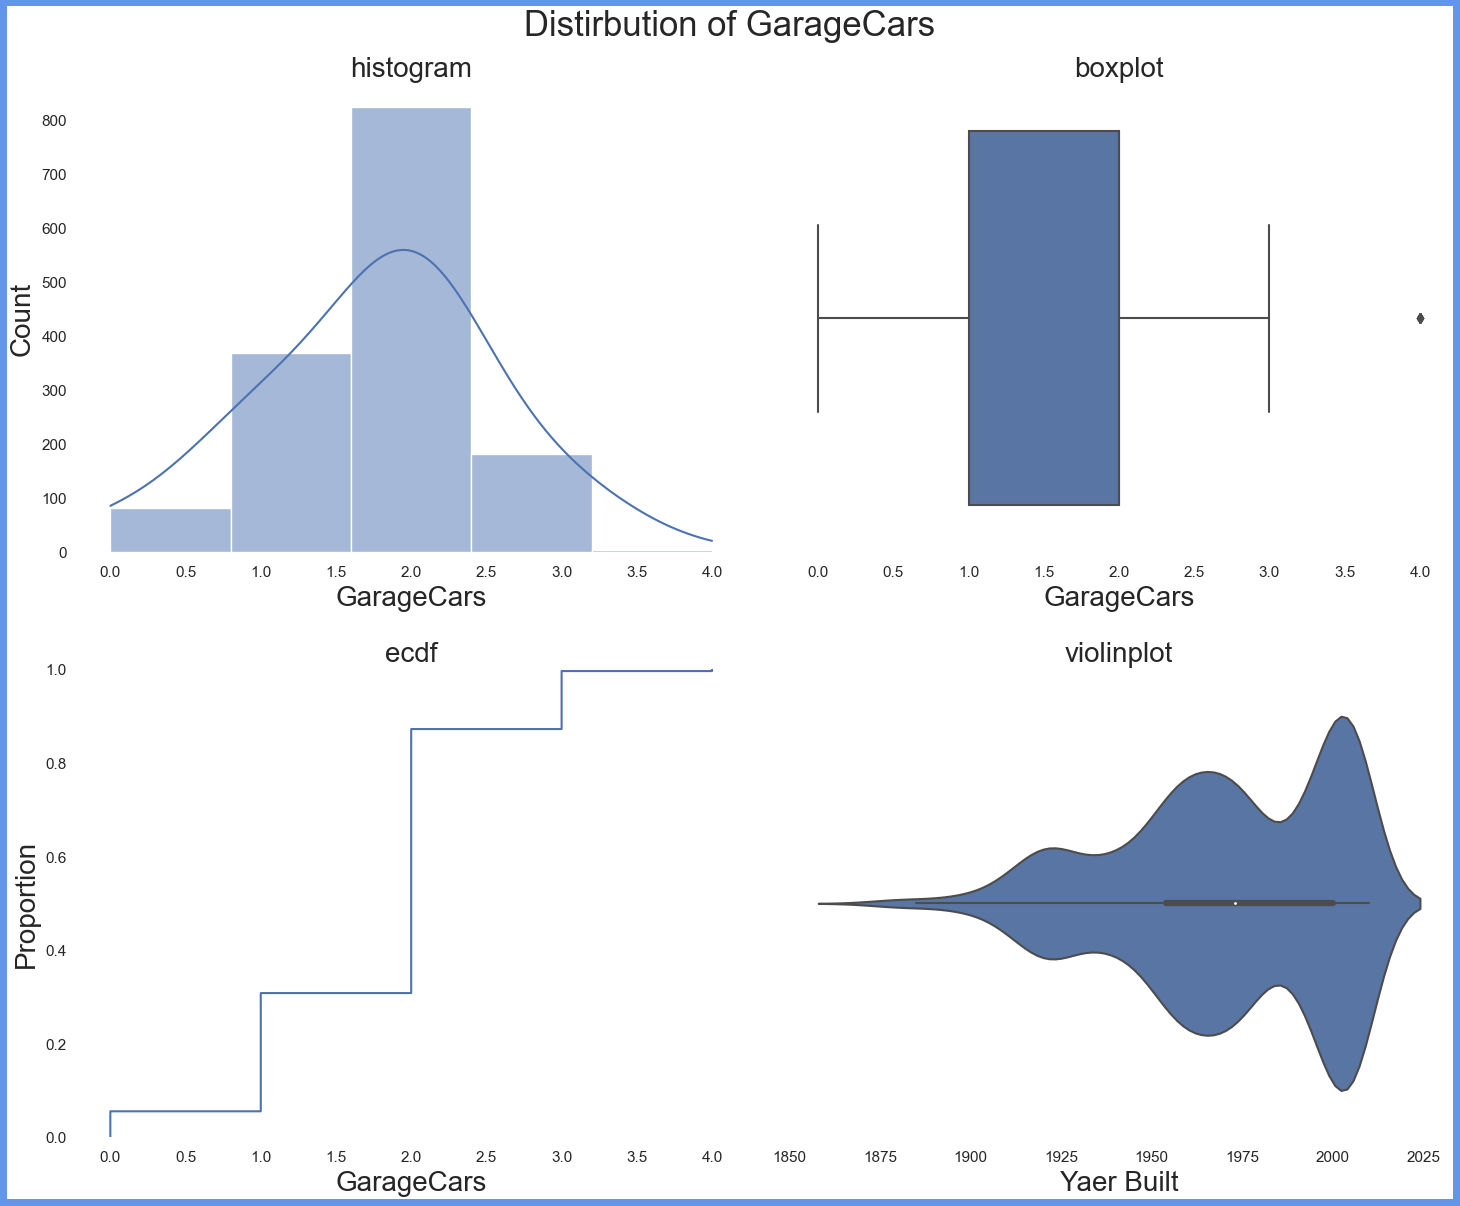

In [116]:
for feature in top_features:
    univariate_numerical_plot_2(X, feature)

In [117]:
X.shape

(1460, 65)

In [118]:
X_test.shape

(1459, 65)

In [119]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MiscVal', 'SaleType', 'SaleCondition',
       'YearBuilt', 'AgeRemodel', 'Age', 'Remodel', 'Garage', 'Bsmt',
       'TotalSF', 'TotalBath', 'Spaciousness_Avg', 'LivLotRation',
       'PorchNumber'],
      dt

In [120]:
Xy_done = X.merge(y,left_index=True, right_index=True)

Xy_done

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
Id                                                                        
1              5         2         65.0     8450         0            3   
2              0         2         80.0     9600         0            3   
3              5         2         68.0    11250         1            3   
4              6         2         60.0     9550         1            3   
5              5         2         84.0    14260         1            3   
...          ...       ...          ...      ...       ...          ...   
1456           5         2         62.0     7917         0            3   
1457           0         2         85.0    13175         0            3   
1458           6         2         66.0     9042         0            3   
1459           0         2         68.0     9717         0            3   
1460           0         2         75.0     9937         0            3   

      Neighborhood  Condition1  BldgType  HouseStyle  OverallQual  \
Id                                                                  
1                3           2         0           2            7   
2               15           1         0           1            6   
3                3           2         0           2            7   
4                4           2         0           2            7   
5               12           2         0           2            8   
...            ...         ...       ...         ...          ...   
1456             6           2         0           2            6   
1457            11           2         0           1            6   
1458             4           2         0           2            7   
1459            10           2         0           1            5   
1460             5           2         0           1            5   

      OverallCond  RoofStyle  Exterior1st  Exterior2nd  ...  MiscVal  \
Id                                                      ...            
1               5          0            8            8  ...        0   
2               8          0            4            4  ...        0   
3               5          0            8            8  ...        0   
4               5          0            9           10  ...        0   
5               5          0            8            8  ...        0   
...           ...        ...          ...          ...  ...      ...   
1456            5          0            8            8  ...        0   
1457            6          0            6            6  ...        0   
1458            9          0            2            2  ...     2500   
1459            6          1            4            4  ...        0   
1460            6          0            3            3  ...        0   

      SaleType  SaleCondition  YearBuilt  AgeRemodel  Age  Remodel  Garage  \
Id                                                                           
1            3              2       2003           5    5        0       1   
2            3              2       1976          31   31        0       1   
3            3              2       2001           6    7        1       1   
4            3              0       1915          36   91        1       1   
5            3              2       2000           8    8        0       1   
...        ...            ...        ...         ...  ...      ...     ...   
1456         3              2       1999           7    8        1       1   
1457         3              2       1978          22   32        1       1   
1458         3              2       1941           4   69        1       1   
1459         3              2       1950          14   60        1       1   
1460         3              2       1965          43   43        0       1   

      Bsmt  TotalSF  TotalBath  Spaciousness_Avg  LivLotRation  PorchNumber  \
Id                                                                            
1        1   3483.0   

In [121]:
Xy_done.isnull().sum().sum()

0

In [122]:
Xy_done.to_csv("Train_set_finish.csv", index = False)
X_test.to_csv("Test_set_finish.csv", index = False)